In [282]:
import numpy as np
import ase.io
import signac

In [2]:
import matplotlib
from matplotlib import pyplot as plt

In [3]:
import pandas

In [5]:
plt.get_cmap('Dark2').colors

((0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4))

In [6]:
palette_dark = plt.cm.Dark2.colors
palette_pastel = plt.cm.Pastel2.colors

# Extract timings using `signac`

In [7]:
project = signac.get_project('scripts/quip')

In [8]:
project

Project.get_project('/local/scratch/mveit/work/rascal_benchmarks/scripts/quip')

In [9]:
print(project.detect_schema())

{
 'atom_width': 'float([0.3, 0.4, 0.5], 3)',
 'cutoff': 'float([5.0], 1)',
 'cutoff_transition_width': 'float([1.0], 1)',
 'energy_reg': 'float([0.001], 1)',
 'energy_scale': 'float([1.0], 1)',
 'force_reg': 'float([0.01], 1)',
 'l_max': 'int([1, 3, 5, ..., 13, 15], 10)',
 'n_max': 'int([2, 4, 6, ..., 12, 14], 8)',
 'n_sparse': 'int([100, 200, 500, ..., 5000, 9000], 7)',
 'soap_zeta': 'int([2, 4], 2)',
 'system_name': 'str([methane_liquid, methane_sulfonic, molecular_crystals, qm9, silicon_bulk], 5)',
 'train_with_forces': 'bool([False, True], 2)',
}


In [10]:
n_sparse_keys = sorted(project.detect_schema()['n_sparse'][int])

In [11]:
n_sparse_keys = np.array(n_sparse_keys)

In [55]:
systems = ['methane_liquid', 'molecular_crystals', 'silicon_bulk', 'qm9', 'methane_sulfonic']

In [13]:
jobs = project.find_jobs({'system_name': 'methane_liquid', 'train_with_forces': False})

In [14]:
len(jobs)

126

### Timing a newer version of QUIP

In [287]:
pwd

'/local/scratch/mveit/work/rascal_benchmarks'

In [363]:
project_quipnew = signac.get_project('../rascal_benchmarks_versions/quip_timings_20210215')

In [364]:
# This is to choose only one set of (n,l) params per system
systems_nlparams = [
    {'system_name': 'methane_liquid', 'n_max': 8, 'l_max': 6, 'atom_width': 0.4},
    {'system_name': 'silicon_bulk', 'n_max': 10, 'l_max': 12, 'atom_width': 0.5},
    {'system_name': 'qm9', 'n_max': 12, 'l_max': 9},
    {'system_name': 'molecular_crystals', 'n_max': 9, 'l_max': 9},
    {'system_name': 'methane_sulfonic', 'n_max': 8, 'l_max': 6}
]

In [365]:
timings_quipnew = []
# Use this to just add all system/n/l combinations
#for job in project.find_jobs({'train_with_forces': False, 'system_name': {'$in': systems}}):
# Or this to choose only one n/l combination per system
for system_params in systems_nlparams:
    for job in project_quipnew.find_jobs(dict(train_with_forces=False, **system_params)):
        sp_keys = {'system_name', 'n_max', 'l_max', 'n_sparse'}
        thedata = {key: job.sp[key] for key in sp_keys}
        thedata.update({key: job.doc[key] for key in job.doc
                        if 'timesub_peratom' in key})
        timings_quipnew.append(thedata)

In [366]:
timings_quipnew = pandas.DataFrame(timings_quipnew)

In [367]:
timings_quipnew

,n_max,l_max,n_sparse,system_name,energy_calc_connect_timesub_peratom_mean,energy_calc_connect_timesub_peratom_min,energy_calc_connect_timesub_peratom_max,energy_calc_connect_timesub_peratom_std,energy_soap_timesub_peratom_mean,energy_soap_timesub_peratom_min,...,force_soap_timesub_peratom_max,force_soap_timesub_peratom_std,force_gap_timesub_peratom_mean,force_gap_timesub_peratom_min,force_gap_timesub_peratom_max,force_gap_timesub_peratom_std,force_ip_total_timesub_peratom_mean,force_ip_total_timesub_peratom_min,force_ip_total_timesub_peratom_max,force_ip_total_timesub_peratom_std
0,8,6,200,methane_liquid,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,6,5000,methane_liquid,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,6,9000,methane_liquid,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,6,1000,methane_liquid,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,6,2000,methane_liquid,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8,6,100,methane_liquid,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8,6,500,methane_liquid,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10,12,500,silicon_bulk,0.000084,0.000015,0.000151,6.350904e-05,0.000343,0.000317,...,0.006415,0.000304,0.000300,0.000295,0.000388,0.000009,0.004229,0.004008,0.006874,0.000331
8,10,12,200,silicon_bulk,0.000084,0.000016,0.000157,6.325317e-05,0.000345,0.000319,...,0.006794,0.000328,0.000157,0.000151,0.000251,0.000010,0.004111,0.003889,0.007111,0.000355
9,10,12,2000,silicon_bulk,0.000084,0.000015,0.000151,6.328643e-05,0.000346,0.000319,...,0.006855,0.000337,0.000972,0.000965,0.001103,0.000016,0.004921,0.004689,0.008085,0.000375


### Older data, plotting two (n,l) sets per system

Text(0.5, 0.98, 'Energies only')

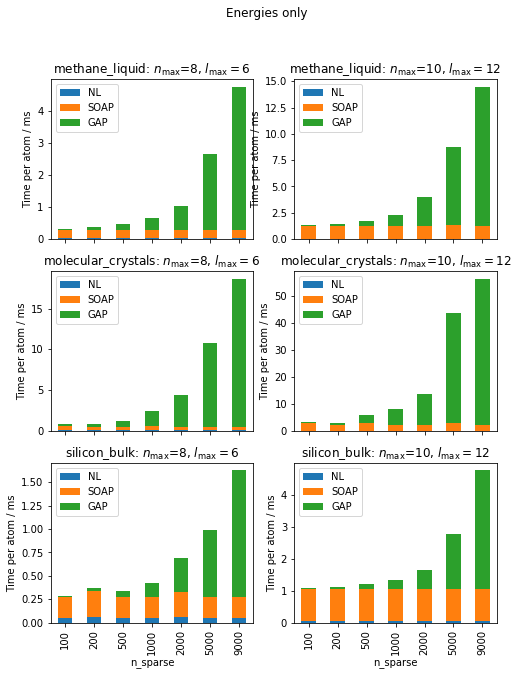

In [75]:
fig, axs = plt.subplots(3, 2, sharex=True)
timings_bysystem = timings.groupby(['system_name', 'n_max', 'l_max'])
for ax, (system_data, timing) in zip(axs.flat, timings_bysystem):
    timing = timing.set_index('n_sparse').sort_index()
    #timing['energy_ip_total_time_peratom_mean'].plot.bar(ax=ax, label='IP total', width=0.8)
    timing_breakdown_energies = timing[['energy_{:s}_time_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
    timing_breakdown_energies.rename(columns={'energy_calc_connect_time_peratom_mean': 'NL',
                                              'energy_soap_time_peratom_mean': 'SOAP',
                                              'energy_gap_time_peratom_mean': 'GAP'},
                                     inplace=True)
    timing_breakdown_energies *= 1000
    timing_breakdown_energies.plot.bar(ax=ax, stacked=True, width=0.5, ylabel='Time per atom / ms')
    ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
fig.set_size_inches((8, 10))
fig.suptitle('Energies only')

KeyError: "None of [Index(['force_calc_connect_time_peratom_mean', 'force_soap_time_peratom_mean',\n       'force_gap_time_peratom_mean'],\n      dtype='object')] are in the [columns]"

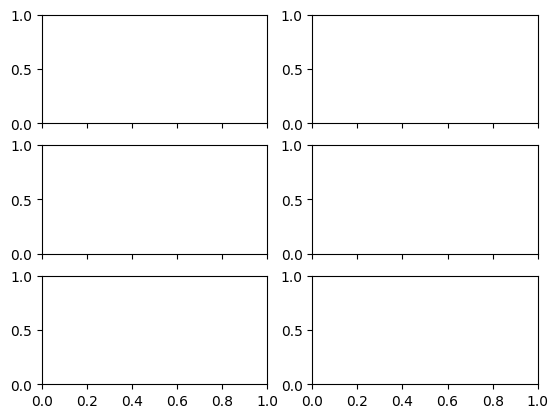

In [180]:
fig, axs = plt.subplots(3, 2, sharex=True)
timings_bysystem = timings.groupby(['system_name', 'n_max', 'l_max'])
for ax, (system_data, timing) in zip(axs.flat, timings_bysystem):
    timing = timing.set_index('n_sparse').sort_index()
    #timing['energy_ip_total_time_peratom_mean'].plot.bar(ax=ax, label='IP total', width=0.8)
    timing_breakdown_energies = timing[['force_{:s}_time_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
    timing_breakdown_energies.rename(columns={'force_calc_connect_time_peratom_mean': 'NL',
                                              'force_soap_time_peratom_mean': 'SOAP',
                                              'force_gap_time_peratom_mean': 'GAP'},
                                     inplace=True)
    timing_breakdown_energies *= 1000
    timing_breakdown_energies.plot.bar(ax=ax, stacked=True, width=0.5, ylabel='Time per atom / ms')
    ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
fig.set_size_inches((8, 10))
fig.suptitle('Energies and forces')

### Let's look at the variability _between runs_ of the quip timings (specifically gap and soap)

In [189]:
# Now with multiple trials for statistics / outlier removal
energy_timings = []
force_timings = []
for system_params in systems_nlparams:
    for job in project.find_jobs(dict(train_with_forces=False, **system_params)):
        sp_keys = {'system_name', 'n_max', 'l_max', 'n_sparse'}
        trials = job.doc['trials']
        for trial in trials:
            thedata = {key: job.sp[key] for key in sp_keys}
            thedata.update({key: trial[key] for key in trial
                            if 'timesub_peratom' in key})
            if 'energy_gap_timesub_peratom_mean' in trial.keys():
                energy_timings.append(thedata)            
            if 'force_gap_timesub_peratom_mean' in trial.keys():
                force_timings.append(thedata)

In [190]:
energy_timings = pandas.DataFrame(energy_timings)

In [196]:
energy_timings.groupby('system_name').get_group('methane_liquid')

,n_max,l_max,n_sparse,system_name,energy_calc_connect_timesub_peratom_mean,energy_calc_connect_timesub_peratom_min,energy_calc_connect_timesub_peratom_max,energy_calc_connect_timesub_peratom_std,energy_soap_timesub_peratom_mean,energy_soap_timesub_peratom_min,energy_soap_timesub_peratom_max,energy_soap_timesub_peratom_std,energy_gap_timesub_peratom_mean,energy_gap_timesub_peratom_min,energy_gap_timesub_peratom_max,energy_gap_timesub_peratom_std,energy_ip_total_timesub_peratom_mean,energy_ip_total_timesub_peratom_min,energy_ip_total_timesub_peratom_max,energy_ip_total_timesub_peratom_std
0,8,6,200,methane_liquid,0.000017,0.000008,0.000019,0.000003,0.000264,0.000117,0.000350,0.000053,0.000065,0.000064,0.000067,4.383225e-07,0.000330,0.000184,0.000416,0.000053
1,8,6,200,methane_liquid,0.000018,0.000008,0.000021,0.000003,0.000251,0.000111,0.000336,0.000051,0.000063,0.000060,0.000065,1.192517e-06,0.000316,0.000177,0.000402,0.000051
2,8,6,200,methane_liquid,0.000018,0.000008,0.000021,0.000003,0.000252,0.000112,0.000336,0.000051,0.000066,0.000065,0.000069,5.354892e-07,0.000319,0.000179,0.000403,0.000051
3,8,6,200,methane_liquid,0.000018,0.000008,0.000021,0.000003,0.000251,0.000112,0.000337,0.000051,0.000065,0.000065,0.000068,3.353976e-07,0.000319,0.000179,0.000404,0.000051
4,8,6,200,methane_liquid,0.000018,0.000008,0.000021,0.000003,0.000251,0.000112,0.000336,0.000051,0.000066,0.000066,0.000067,1.868463e-07,0.000319,0.000180,0.000404,0.000051
5,8,6,200,methane_liquid,0.000018,0.000008,0.000021,0.000003,0.000252,0.000111,0.000335,0.000051,0.000065,0.000065,0.000068,3.632372e-07,0.000319,0.000178,0.000402,0.000051
6,8,6,5000,methane_liquid,0.000017,0.000008,0.000021,0.000003,0.000267,0.000119,0.000375,0.000055,0.002081,0.002077,0.002103,4.303439e-06,0.002350,0.002200,0.002479,0.000056
7,8,6,5000,methane_liquid,0.000019,0.000009,0.000021,0.000003,0.000253,0.000113,0.000340,0.000051,0.002068,0.002065,0.002074,2.332215e-06,0.002323,0.002181,0.002411,0.000051
8,8,6,5000,methane_liquid,0.000019,0.000009,0.000021,0.000003,0.000253,0.000115,0.000339,0.000051,0.002163,0.002161,0.002171,1.553969e-06,0.002419,0.002284,0.002505,0.000051
9,8,6,5000,methane_liquid,0.000019,0.000009,0.000022,0.000003,0.000252,0.000114,0.000338,0.000051,0.002040,0.002037,0.002046,1.794226e-06,0.002295,0.002155,0.002387,0.000051


In [197]:
force_timings = pandas.DataFrame(force_timings)

In [198]:
force_timings

,n_max,l_max,n_sparse,system_name,force_calc_connect_timesub_peratom_mean,force_calc_connect_timesub_peratom_min,force_calc_connect_timesub_peratom_max,force_calc_connect_timesub_peratom_std,force_soap_timesub_peratom_mean,force_soap_timesub_peratom_min,force_soap_timesub_peratom_max,force_soap_timesub_peratom_std,force_gap_timesub_peratom_mean,force_gap_timesub_peratom_min,force_gap_timesub_peratom_max,force_gap_timesub_peratom_std,force_ip_total_timesub_peratom_mean,force_ip_total_timesub_peratom_min,force_ip_total_timesub_peratom_max,force_ip_total_timesub_peratom_std
0,8,6,200,methane_liquid,0.000019,0.000008,0.000021,3.017289e-06,0.002530,0.000904,0.003455,0.000583,0.000247,0.000171,0.000479,0.000035,0.002826,0.001077,0.003807,0.000628
1,8,6,200,methane_liquid,0.000018,0.000008,0.000022,3.005025e-06,0.002523,0.000906,0.003463,0.000580,0.000245,0.000174,0.000299,0.000026,0.002810,0.001082,0.003811,0.000620
2,8,6,200,methane_liquid,0.000018,0.000008,0.000021,2.969683e-06,0.002523,0.000903,0.003456,0.000581,0.000245,0.000174,0.000304,0.000026,0.002809,0.001080,0.003803,0.000621
3,8,6,200,methane_liquid,0.000018,0.000008,0.000021,2.980088e-06,0.002525,0.000907,0.003456,0.000580,0.000244,0.000173,0.000324,0.000027,0.002810,0.001082,0.003798,0.000619
4,8,6,200,methane_liquid,0.000019,0.000009,0.000021,3.016363e-06,0.002527,0.000903,0.003456,0.000582,0.000244,0.000173,0.000286,0.000026,0.002820,0.001079,0.003809,0.000623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,8,6,500,methane_sulfonic,0.000006,0.000005,0.000007,6.013423e-07,0.001347,0.001257,0.001427,0.000039,0.001279,0.001267,0.001339,0.000014,0.002689,0.002583,0.002777,0.000045
206,8,6,500,methane_sulfonic,0.000006,0.000005,0.000007,6.230251e-07,0.001356,0.001268,0.001434,0.000038,0.001382,0.001374,0.001435,0.000010,0.002798,0.002699,0.002905,0.000044
207,8,6,500,methane_sulfonic,0.000006,0.000005,0.000007,6.247816e-07,0.001351,0.001263,0.001431,0.000038,0.001306,0.001294,0.001385,0.000014,0.002711,0.002608,0.002847,0.000046
208,8,6,500,methane_sulfonic,0.000006,0.000005,0.000007,6.187002e-07,0.001356,0.001280,0.001436,0.000038,0.001277,0.001267,0.001335,0.000012,0.002690,0.002608,0.002776,0.000041


n_sparse
100000     [[AxesSubplot(0.125,0.11;0.775x0.77)]]
200000     [[AxesSubplot(0.125,0.11;0.775x0.77)]]
500000     [[AxesSubplot(0.125,0.11;0.775x0.77)]]
1000000    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
2000000    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
5000000    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
9000000    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

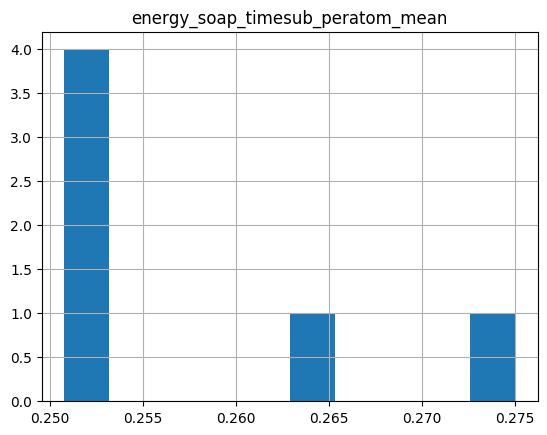

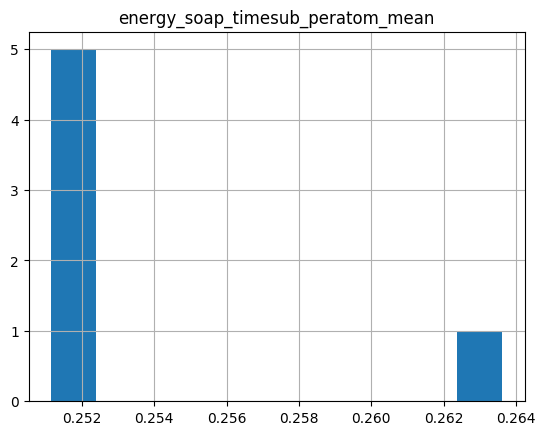

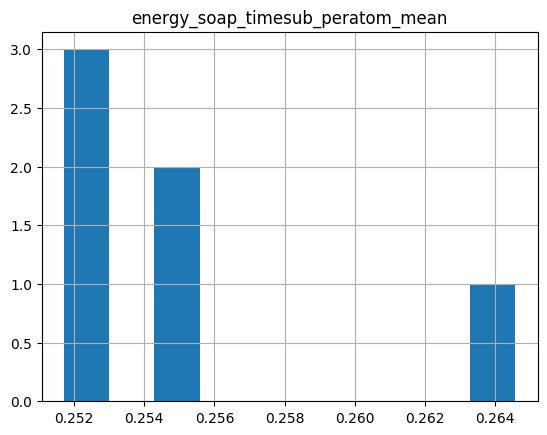

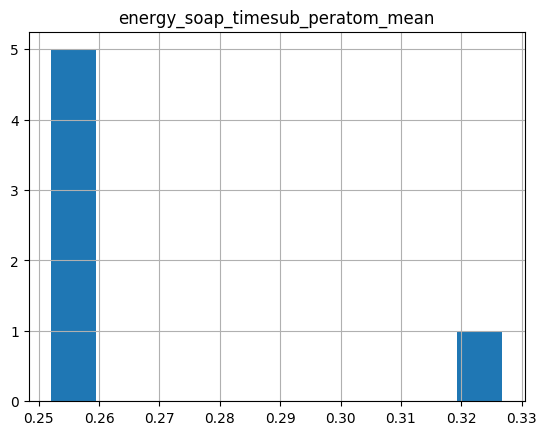

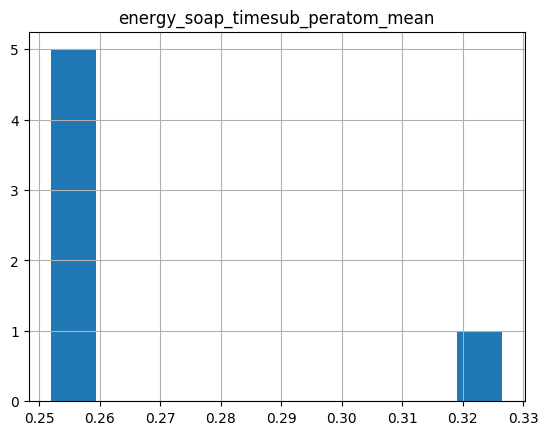

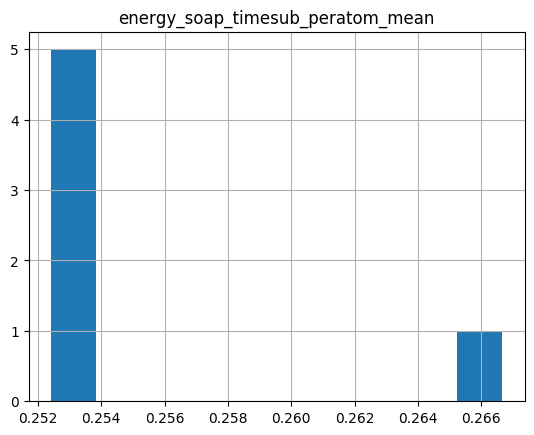

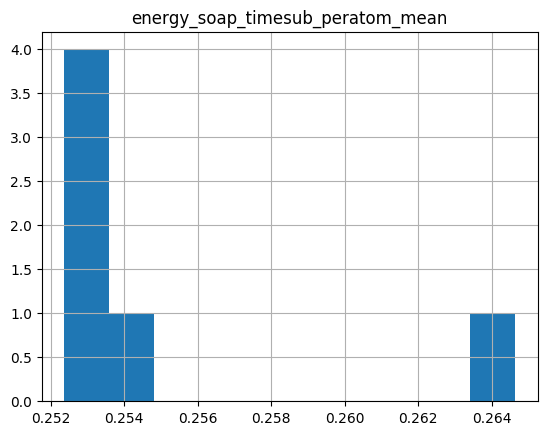

In [214]:
(energy_timings[(energy_timings['system_name'] == 'methane_liquid')][
    ['energy_soap_timesub_peratom_mean', 'n_sparse']] * 1000).groupby('n_sparse').hist()

In [217]:
(energy_timings[(energy_timings['system_name'] == 'methane_liquid')][
    ['energy_soap_timesub_peratom_mean', 'n_sparse']] * 1000).groupby('n_sparse').median()

,energy_soap_timesub_peratom_mean
n_sparse,
100000,0.251915
200000,0.251484
500000,0.253869
1000000,0.252882
2000000,0.253799
5000000,0.252938
9000000,0.253115


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0cd83b96d0>]],
      dtype=object)

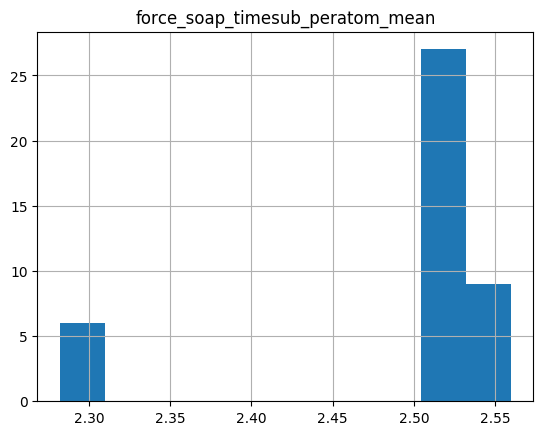

In [226]:
(force_timings[(force_timings['system_name'] == 'methane_liquid')][
    ['force_soap_timesub_peratom_mean']] * 1000).hist()

In [242]:
n_sparse = sorted(force_timings['n_sparse'].unique())

In [243]:
n_sparse

[100, 200, 500, 1000, 2000, 5000, 9000]

In [266]:
?pandas.pivot

Text(0.5, 1.0, 'Liquid methane')

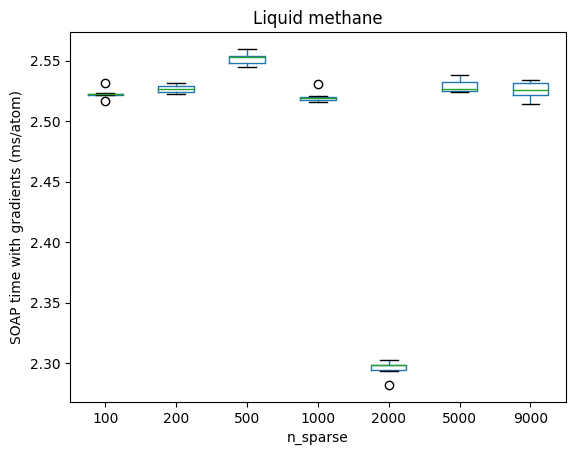

In [278]:
(force_timings[(force_timings['system_name'] == 'methane_liquid')].pivot(
    columns='n_sparse', values='force_soap_timesub_peratom_mean') * 1000).plot.box()
plt.xlabel('n_sparse')
plt.ylabel('SOAP time with gradients (ms/atom)')
plt.title('Liquid methane')

Text(0.5, 1.0, 'Bulk silicon')

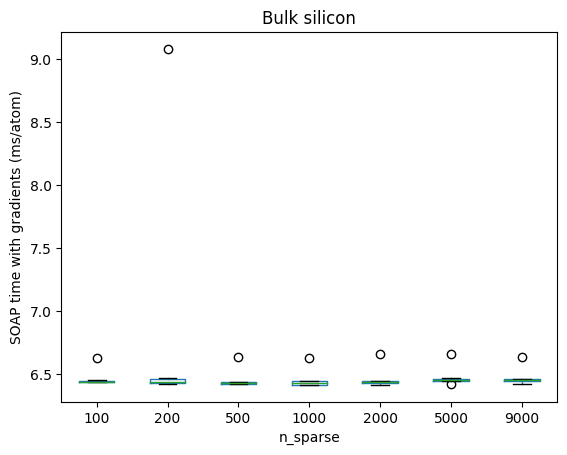

In [277]:
(force_timings[(force_timings['system_name'] == 'silicon_bulk')].pivot(
    columns='n_sparse', values='force_soap_timesub_peratom_mean') * 1000).plot.box()
plt.xlabel('n_sparse')
plt.ylabel('SOAP time with gradients (ms/atom)')
plt.title('Bulk silicon')

Text(0.5, 1.0, 'Molecular crystals')

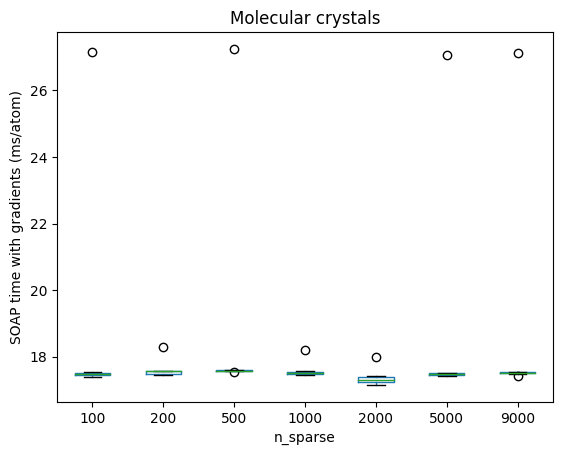

In [279]:
(force_timings[(force_timings['system_name'] == 'molecular_crystals')].pivot(
    columns='n_sparse', values='force_soap_timesub_peratom_mean') * 1000).plot.box()
plt.xlabel('n_sparse')
plt.ylabel('SOAP time with gradients (ms/atom)')
plt.title('Molecular crystals')

Text(0.5, 1.0, 'QM9')

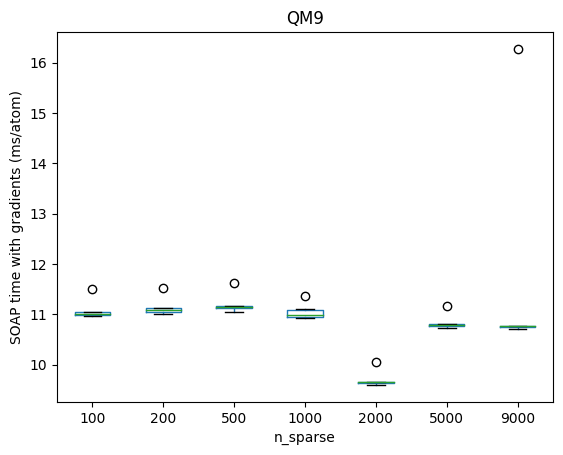

In [280]:
(force_timings[(force_timings['system_name'] == 'qm9')].pivot(
    columns='n_sparse', values='force_soap_timesub_peratom_mean') * 1000).plot.box()
plt.xlabel('n_sparse')
plt.ylabel('SOAP time with gradients (ms/atom)')
plt.title('QM9')

Text(0.5, 1.0, 'Methanesulfonic acid')

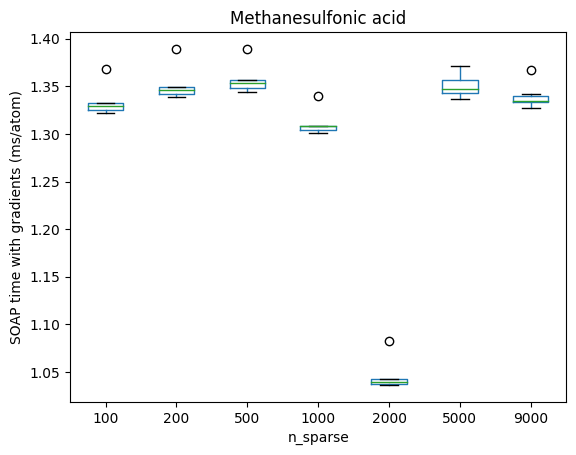

In [281]:
(force_timings[(force_timings['system_name'] == 'methane_sulfonic')].pivot(
    columns='n_sparse', values='force_soap_timesub_peratom_mean') * 1000).plot.box()
plt.xlabel('n_sparse')
plt.ylabel('SOAP time with gradients (ms/atom)')
plt.title('Methanesulfonic acid')

In [2]:
# QUIP descriptor dimensions, n=8, l=6, single species
print(7 * (8*9)//2)

252


In [3]:
# QUIP descriptor dimensions, n=10, l=12, single species
print(13 * (10*11)//2)

715


In [4]:
print(715 / 252)

2.8373015873015874


...so the 

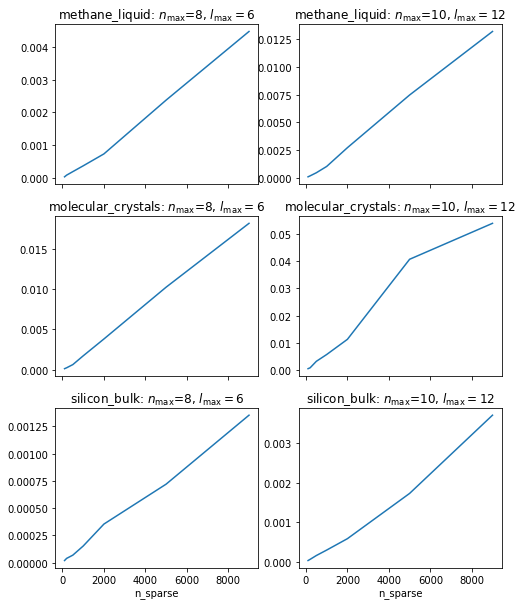

In [72]:
fig, axs = plt.subplots(3, 2, sharex=True)
timings_bysystem = timings.groupby(['system_name', 'n_max', 'l_max'])
for ax, (system_data, timing) in zip(axs.flat, timings_bysystem):
    timing = timing.set_index('n_sparse').sort_index()
    timing = timing.rename(columns={'energy_gap_time_peratom_mean': 'GAP'})['GAP']
    timing.plot(ax=ax)
    ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
fig.set_size_inches((8, 10))

### Newer data, one (n,l) set per system

In [22]:
%pdb

Automatic pdb calling has been turned ON


In [294]:
import itertools

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 0.98, 'Energies and forces')

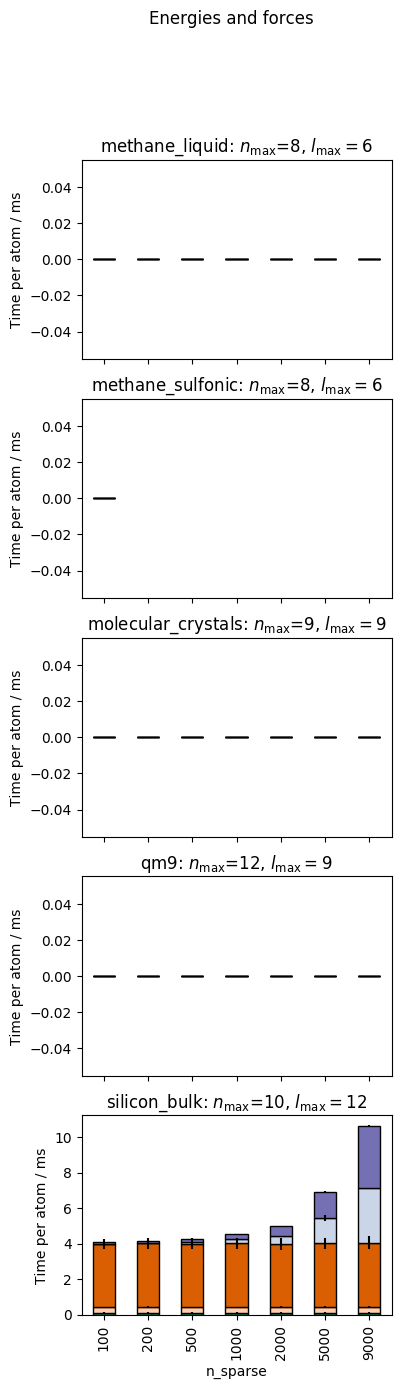

In [295]:
plt.style.use('default')
fig, axs = plt.subplots(5, 1, sharex=True)
timings_bysystem = timings.groupby(['system_name', 'n_max', 'l_max'])
for ax, (system_data, timing) in zip(axs.flat, timings_bysystem):
    timing = timing.set_index('n_sparse').sort_index()
    #timing['energy_ip_total_time_peratom_mean'].plot.bar(ax=ax, label='IP total', width=0.8)
    timing_breakdown = timing[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                              ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
    timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                     'energy_soap_timesub_peratom_mean': 'SOAP (E)',
                                     'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                     inplace=True)
    timing_breakdown = timing_breakdown.assign(
        **{'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
           'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
           'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
    timing_breakdown = timing_breakdown[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']] * 1000
    timing_breakdown_errs = timing[['force_{:s}_timesub_peratom_std'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                                   ['energy_{:s}_timesub_peratom_std'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
    timing_breakdown_errs = timing_breakdown_errs.rename(
        columns={'energy_calc_connect_timesub_peratom_std': 'NL',
                 'energy_soap_timesub_peratom_std': 'SOAP (E)',
                 'energy_gap_timesub_peratom_std': 'GAP (E)',
                 'force_soap_timesub_peratom_std': 'SOAP (F)',
                 'force_gap_timesub_peratom_std': 'GAP (F)'}) * 1000
    bs = timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.5, ylabel='Time per atom / ms', yerr=timing_breakdown_errs,
                              color={'NL': palette_dark[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                     'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                              legend=False, edgecolor='k')
    bars = (child for child in bs.get_children() if isinstance(child, matplotlib.patches.Rectangle))
    for idx, rect in enumerate(bars):
        if (idx % 5) == 0:
            rect.set_edgecolor('k')
    ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
fig.set_size_inches((4, 15))
fig.suptitle('Energies and forces')

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 0.98, 'Energies and forces (SOAP only)')

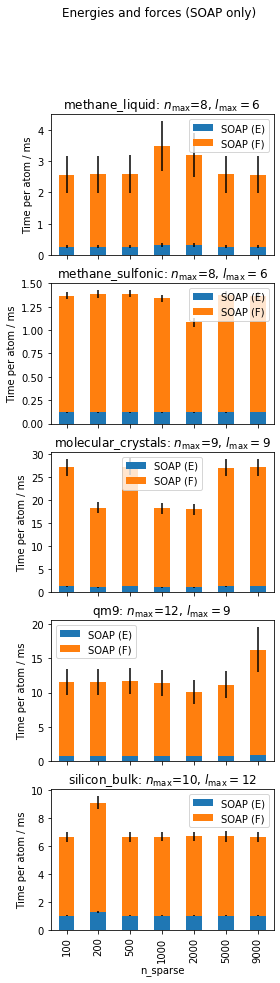

In [146]:
fig, axs = plt.subplots(5, 1, sharex=True)
timings_bysystem = timings.groupby(['system_name', 'n_max', 'l_max'])
for ax, (system_data, timing) in zip(axs.flat, timings_bysystem):
    timing = timing.set_index('n_sparse').sort_index()
    #timing['energy_ip_total_time_peratom_mean'].plot.bar(ax=ax, label='IP total', width=0.8)
    timing_breakdown = timing[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                              ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
    timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                              'energy_soap_timesub_peratom_mean': 'SOAP (E)',
                                              'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                     inplace=True)
    timing_breakdown = timing_breakdown.assign(
        **{'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
           'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)'])})
    timing_breakdown = timing_breakdown[['SOAP (E)', 'SOAP (F)']] * 1000
    timing_errs = timing[['energy_soap_timesub_peratom_std',
                          'force_soap_timesub_peratom_std']] * 1000
    timing_errs.rename(columns={'energy_soap_timesub_peratom_std': 'SOAP (E)',
                                'force_soap_timesub_peratom_std': 'SOAP (F)'},
                                inplace=True)
    #print(timing_errs)
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.5, ylabel='Time per atom / ms', yerr=timing_errs)
    ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
fig.set_size_inches((4, 15))
fig.suptitle('Energies and forces (SOAP only)')

Text(0.5, 0.98, 'Energies and forces (SOAP only)')

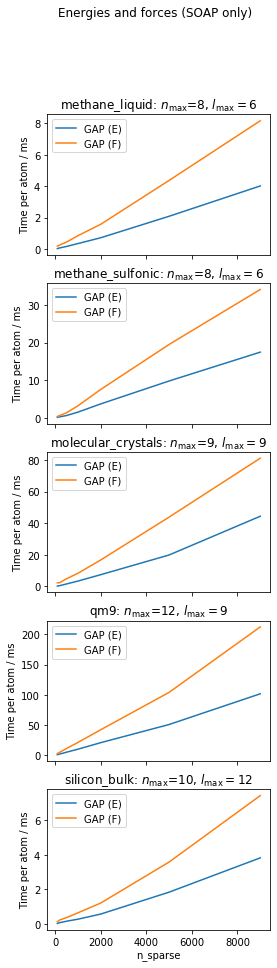

In [125]:
fig, axs = plt.subplots(5, 1, sharex=True)
timings_bysystem = timings.groupby(['system_name', 'n_max', 'l_max'])
for ax, (system_data, timing) in zip(axs.flat, timings_bysystem):
    timing = timing.set_index('n_sparse').sort_index()
    #timing['energy_ip_total_time_peratom_mean'].plot.bar(ax=ax, label='IP total', width=0.8)
    timing_breakdown = timing[['force_{:s}_time_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                              ['energy_{:s}_time_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
    timing_breakdown.rename(columns={'energy_calc_connect_time_peratom_mean': 'NL',
                                     'energy_soap_time_peratom_mean': 'SOAP (E)',
                                     'energy_gap_time_peratom_mean': 'GAP (E)',
                                     'force_soap_time_peratom_mean': 'SOAP (F)',
                                     'force_gap_time_peratom_mean': 'GAP (F)'},
                                     inplace=True)
    timing_breakdown = timing_breakdown[['GAP (E)', 'GAP (F)']] * 1000
    timing_breakdown.plot(ax=ax, ylabel='Time per atom / ms')
    ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
fig.set_size_inches((4, 15))
fig.suptitle('Energies and forces (SOAP only)')

## Now try to get librascal timings

In [296]:
rascal_project = signac.get_project('scripts/model')

In [297]:
len(rascal_project.find_jobs({'name': 'methane_liquid', 'sparse_point_subselection.Nselect.1': 50}))

26

In [29]:
job  = rascal_project.find_jobs({
    'name': 'methane_liquid',
    'sparse_point_subselection.Nselect.1': 50,
    'feature_subselection.Nselect': None,
    'grads_timing': False
}).next()
print(job.sp)

{'representation': {'interaction_cutoff': 5, 'cutoff_smooth_width': 1.0, 'max_radial': 8, 'max_angular': 6, 'gaussian_sigma_type': 'Constant', 'soap_type': 'PowerSpectrum', 'normalize': True, 'expansion_by_species_method': 'structure wise', 'global_species': [1, 6], 'compute_gradients': False, 'cutoff_function_parameters': {}, 'cutoff_function_type': 'ShiftedCosine', 'gaussian_sigma_constant': 0.4, 'coefficient_subselection': None, 'radial_basis': 'GTO', 'optimization_args': {'type': 'Spline', 'accuracy': 1e-08, 'range': [0, 5]}}, 'kernel': {'name': 'GAP', 'zeta': 2, 'target_type': 'Structure', 'kernel_type': 'Sparse'}, 'name': 'methane_liquid', 'filename': '../../structures/methane_liquid.json', 'self_contributions': {'1': 0, '6': 0}, 'train_with_grad': False, 'grads_timing': False, 'sparse_point_subselection': {'Nselect': {'1': 50, '6': 50}, 'act_on': 'sample per species', 'seed': 10}, 'feature_subselection': {'Nselect': None, 'act_on': 'feature', 'seed': 10}, 'N_ITERATIONS': 5, 'sta

In [30]:
64 * 7 * (2*3/2) * 0.7

940.8

In [31]:
job.sp.sparse_point_subselection.Nselect

{'1': 50, '6': 50}

In [54]:
job.doc.benchmark

[{'tag': 'NL',
  'mean': 0.039679642952978614,
  'stdev': 0.0033444346664658446,
  'min': 0.03301914408802986,
  'max': 0.041809042915701866,
  'samples': [0.03301914408802986,
   0.04087645187973976,
   0.041485587134957314,
   0.04120798874646425,
   0.041809042915701866],
  'name': 'methane_liquid',
  'n_atoms': 3645},
 {'tag': 'rep',
  'mean': 0.34841556269675494,
  'stdev': 0.0032806063653865775,
  'min': 0.3431319948285818,
  'max': 0.3528908141888678,
  'samples': [0.34680385515093803,
   0.3528908141888678,
   0.34921201318502426,
   0.35003913613036275,
   0.3431319948285818],
  'name': 'methane_liquid',
  'n_atoms': 3645},
 {'tag': 'pred energy',
  'mean': 0.05951081495732069,
  'stdev': 0.0005671412646682664,
  'min': 0.058505678083747625,
  'max': 0.06013721600174904,
  'samples': [0.058505678083747625,
   0.05949609028175473,
   0.05996047332882881,
   0.05945461709052324,
   0.06013721600174904],
  'name': 'methane_liquid',
  'n_atoms': 3645}]

In [298]:
systems_short = ['silicon_bulk', 'methane_liquid', 'methane_sulfonic']
n_basis = {
    'silicon_bulk': [200, 1000, 2000],
    'methane_liquid': [200, 1000, 2000],
    'methane_sulfonic': [200, 1000, 2000]
}

In [299]:
#n_features = {'silicon_bulk': 909, 'qm9': 15119}
benchmarks = []
for name in systems_short:
    for job in rascal_project.find_jobs({'name': name,
                                         'feature_subselection.Nselect': None,
                                         'train_with_grad': False,
                                         'grads_timing': False
                                        }):
        for bmark in job.doc.benchmark:
            bmark = bmark.copy()
            bmark['mean per atom / ms'] = bmark['mean'] / bmark['n_atoms'] * 1000
            bmark['stdev per atom / ms'] = bmark['stdev'] / bmark['n_atoms'] * 1000
            bmark['n_sparse'] = sum(val for key, val in job.sp.sparse_point_subselection.Nselect.items())
            benchmarks.append(bmark)
benchmarks = pandas.DataFrame(benchmarks)

In [34]:
for name, timing in benchmarks.groupby('name'):
    print(name)
    print(timing.pivot(index='n_sparse', columns='tag', values='mean per atom / ms'))

methane_liquid
tag             NL  pred energy       rep
n_sparse                                 
100       0.010886     0.016327  0.095587
200       0.008715     0.040915  0.093331
500       0.009920     0.122720  0.093974
1000      0.008431     0.245968  0.090716
2000      0.009844     0.522809  0.095373
5000      0.008438     1.594573  0.094078
7000      0.009929     2.715276  0.093046
9000      0.008522     2.791317  0.095326
methane_sulfonic
tag             NL  pred energy       rep
n_sparse                                 
100       0.003721     0.030982  0.068564
200       0.003743     0.078979  0.067867
500       0.003855     0.196108  0.068455
1000      0.003826     0.486211  0.067719
2000      0.003831     0.980776  0.068147
5000      0.004002     2.989568  0.067839
7000      0.004119     4.122358  0.067466
9000      0.004165     5.829002  0.068030
silicon_bulk
tag             NL  pred energy       rep
n_sparse                                 
100       0.012423     0.030264

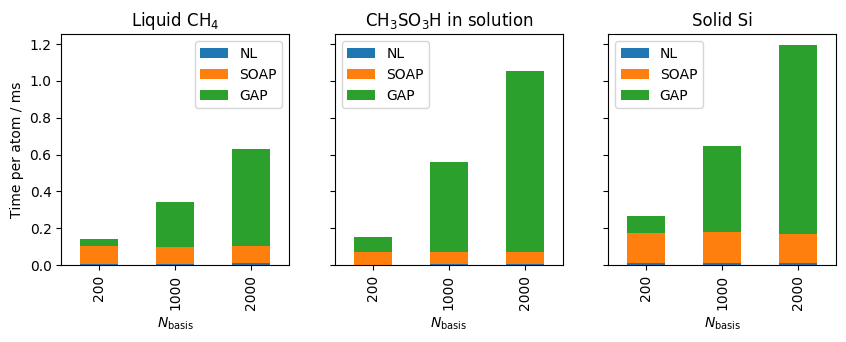

In [300]:
fig, axs = plt.subplots(1, 3, sharey=True)
timings_bysystem = benchmarks.groupby('name')
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in solution",
    'silicon_bulk': 'Solid Si'
}
for ax, (system_name, timing) in zip(axs.flat, timings_bysystem):
    timing_breakdown = timing.pivot(index='n_sparse', columns='tag', values='mean per atom / ms')
    timing_breakdown_stdev = timing.pivot(index='n_sparse', columns='tag', values='stdev per atom / ms')
    timing_breakdown = timing_breakdown.sort_index().rename(columns={
        'pred energy': 'GAP',
        'rep': 'SOAP'})[['NL', 'SOAP', 'GAP']].loc[n_basis[system_name]]
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.5,
                              xlabel='$N_\\mathrm{basis}$', ylabel='Time per atom / ms',
                              legend=(system_name == 'methane_liquid'))
    ax.legend().set_title(None)
    ax.set_title(display_names[system_name])
fig.set_size_inches((10, 3))
#fig.suptitle('Energies only')

OLD energies and forces (forces need optimization!)

Text(0.5, 0.98, 'Energies and forces')

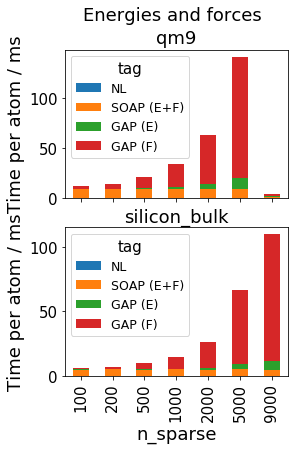

In [281]:
fig, axs = plt.subplots(2, 1, sharex=True)
timings_bysystem = benchmarks.groupby('name')
for ax, (system_name, timing) in zip(axs.flat, timings_bysystem):
    timing_breakdown = timing.pivot(index='n_sparse', columns='tag', values='mean per atom / ms')
    timing_breakdown_stdev = timing.pivot(index='n_sparse', columns='tag', values='stdev per atom / ms')
    timing_breakdown = timing_breakdown.sort_index().rename(columns={
        'pred energy': 'GAP (E)',
        'pred forces': 'GAP (F)',
        'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']].drop(7000)
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.5, ylabel='Time per atom / ms')
    ax.set_title(system_name)
fig.set_size_inches((4, 6))
fig.suptitle('Energies and forces')

### SOAP and GAP

KeyError: "None of [Int64Index([200, 1000, 2000], dtype='int64', name='n_sparse')] are in the [index]"

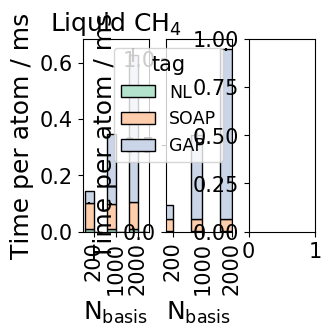

In [301]:
plt.style.use('beamer')
fig, axs = plt.subplots(1, 3, sharey=False, gridspec_kw={'wspace': 0.25})
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si'
}
# I think we can rely on the sorting-by-keys to keep these in the same order...
for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
    # librascal
    timing_breakdown = timing_rascal.pivot(index='n_sparse', columns='tag', values='mean per atom / ms')
    timing_breakdown_stdev = timing_rascal.pivot(index='n_sparse', columns='tag', values='stdev per atom / ms').rename(
        columns={'pred energy': 'GAP', 'rep': 'SOAP'})
    timing_breakdown = timing_breakdown.sort_index().rename(columns={
        'pred energy': 'GAP',
        'rep': 'SOAP'})[['NL', 'SOAP', 'GAP']].loc[n_basis[system_name]]
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4,
                              xlabel='$N_\\mathrm{basis}$', ylabel='Time per atom / ms',
                              legend=(system_name == 'methane_sulfonic'),
                              color={'NL': palette_pastel[0], 'SOAP': palette_pastel[1],
                                     'GAP': palette_pastel[2]}, yerr=timing_breakdown_stdev,
                              align='edge', edgecolor='k')
    
    # QUIP
    timing = timing_quip.set_index('n_sparse').sort_index()
    timing_breakdown = timing[['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
    timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                     'energy_soap_timesub_peratom_mean': 'SOAP',
                                     'energy_gap_timesub_peratom_mean': 'GAP'},
                                     inplace=True)
    timing_breakdown = timing_breakdown[['NL', 'SOAP', 'GAP']].loc[n_basis[system_name]] * 1000
    timing_errs = timing[['energy_soap_timesub_peratom_std',
                          'energy_gap_timesub_peratom_std',
                          'energy_calc_connect_timesub_peratom_std']].loc[n_basis[system_name]].rename(
        columns={'energy_soap_timesub_peratom_std': 'SOAP',
                 'energy_gap_timesub_peratom_std': 'GAP',
                 'energy_calc_connect_timesub_peratom_std': 'NL'}) * 1000
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, xlabel='$N_\\mathrm{basis}$',
                              ylabel=('Time per atom / ms' if system_name == 'methane_liquid' else ''),
                              color={'NL': palette_pastel[0], 'SOAP': palette_pastel[1],
                                     'GAP': palette_pastel[2]}, yerr=timing_errs,
                              align='edge', legend=(system_name == 'methane_sulfonic'),
                              edgecolor='gray')
    #ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
    #ax.legend().set_title(None)
    ax.set_title(display_names[system_name])
    ax.set_xlim(-0.5, 2.5)
fig.set_size_inches((10, 4))
fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_overall_eonly.pdf', bbox_inches='tight')

Now with descriptors only

**TODO** (weighted) average over n_sparse

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


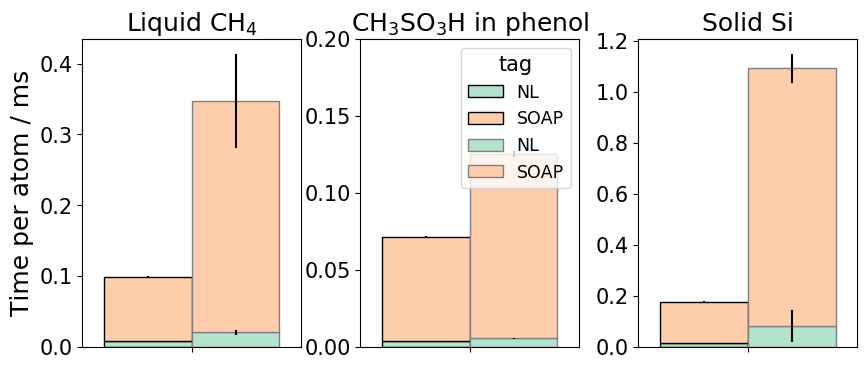

In [101]:
plt.style.use('beamer')
fig, axs = plt.subplots(1, 3, sharey=False, gridspec_kw={'wspace': 0.27})
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si'
}
# I think we can rely on the sorting-by-keys to keep these in the same order...
for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
    # librascal
    timing_breakdown = timing_rascal.pivot(index='n_sparse', columns='tag', values='mean per atom / ms')
    timing_breakdown = timing_breakdown.sort_index().rename(columns={
        'pred energy': 'GAP',
        'rep': 'SOAP'})[['NL', 'SOAP']].loc[1000:1000]
    timing_breakdown_stdev = timing_rascal.pivot(index='n_sparse', columns='tag', values='stdev per atom / ms').rename(
        columns={'pred energy': 'GAP', 'rep': 'SOAP'})
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4,
                              #xlabel='$N_\\mathrm{basis}$',
                              ylabel='Time per atom / ms',
                              legend=(system_name == 'methane_sulfonic'),
                              color={'NL': palette_pastel[0], 'SOAP': palette_pastel[1]},
                              yerr=timing_breakdown_stdev, edgecolor='k',
                              align='edge')
    
    # QUIP
    timing = timing_quip.set_index('n_sparse').sort_index()
    timing_breakdown = timing[['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
    timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                     'energy_soap_timesub_peratom_mean': 'SOAP',
                                     'energy_gap_timesub_peratom_mean': 'GAP'},
                                     inplace=True)
    timing_breakdown = timing_breakdown[['NL', 'SOAP']].loc[1000:1000] * 1000
    timing_errs = timing[['energy_soap_timesub_peratom_std',
                          'energy_gap_timesub_peratom_std',
                          'energy_calc_connect_timesub_peratom_std']].loc[n_basis[system_name]].rename(
        columns={'energy_soap_timesub_peratom_std': 'SOAP',
                 'energy_calc_connect_timesub_peratom_std': 'NL'}) * 1000
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4,
                              #xlabel='$N_\\mathrm{basis}$',
                              xlabel='',
                              ylabel=('Time per atom / ms' if system_name == 'methane_liquid' else ''),
                              color={'NL': palette_pastel[0], 'SOAP': palette_pastel[1]},
                              yerr=timing_errs, edgecolor='gray',
                              align='edge', legend=(system_name == 'methane_sulfonic'))
    ax.set_xticklabels([])
    if system_name == 'methane_sulfonic':
        ax.set_ylim(0, 0.2)
    #ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
    #ax.legend().set_title(None)
    ax.set_title(display_names[system_name])
    ax.set_xlim(-0.5, 0.5)
fig.set_size_inches((10, 4))
fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_soap_eonly.pdf', bbox_inches='tight')

In [445]:
pandas.DataFrame({'val': timing_breakdown})

,val
tag,
NL,0.009336
SOAP,0.093929
pos,-0.400000


With **un**optimized forces

In [239]:
#n_features = {'silicon_bulk': 909, 'qm9': 15119}
benchmarks_grads = []
for name in systems:
    for job in rascal_project.find_jobs({'name': name,
                                         'feature_subselection.Nselect': None,
                                         'train_with_grad': False,
                                         'grads_timing': True
                                        }):
        for bmark in job.doc.benchmark:
            bmark = bmark.copy()
            bmark['mean per atom / ms'] = bmark['mean'] / bmark['n_atoms'] * 1000
            bmark['stdev per atom / ms'] = bmark['stdev'] / bmark['n_atoms'] * 1000
            bmark['n_sparse'] = sum(val for key, val in job.sp.sparse_point_subselection.Nselect.items())
            benchmarks_grads.append(bmark)
benchmarks_grads = pandas.DataFrame(benchmarks_grads)

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


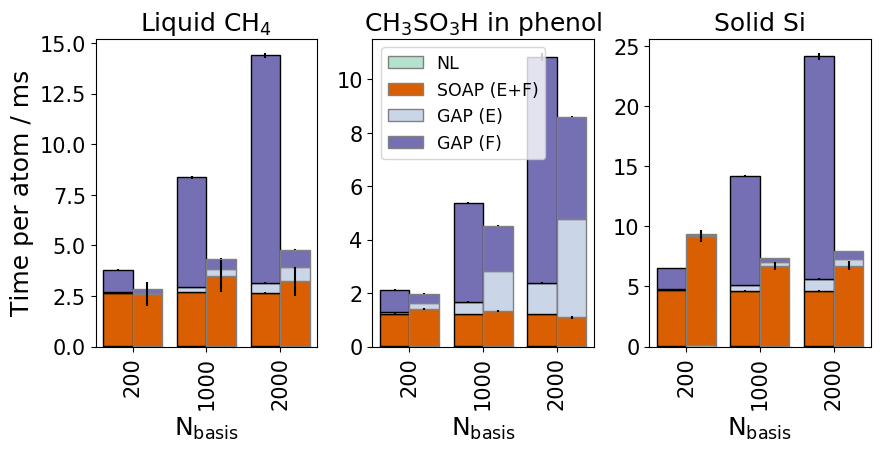

In [232]:
plt.style.use('beamer')
fig, axs = plt.subplots(1, 3, sharey=False, gridspec_kw={'wspace': 0.25})
timings_bysystem_rascal = benchmarks_grads.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)
# I think we can rely on the sorting-by-keys to keep these in the same order...
for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
    # librascal
    timing_breakdown = timing_rascal.pivot(index='n_sparse', columns='tag', values='mean per atom / ms')
    timing_breakdown_stdev = timing_rascal.pivot(index='n_sparse', columns='tag', values='stdev per atom / ms')
    timing_breakdown = timing_breakdown.sort_index().rename(columns={
        'pred energy': 'GAP (E)',
        'pred forces': 'GAP (F)',
        'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']].loc[n_basis[system_name]]
    timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
        'pred energy': 'GAP (E)',
        'pred forces': 'GAP (F)',
        'rep with grad': 'SOAP (E+F)'
    })
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                              color={'NL': palette_pastel[0], 'SOAP (E+F)': palette_dark[1],
                                     'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                              yerr=timing_breakdown_stdev,
                              legend=False, align='edge', edgecolor='k')
    
    # QUIP
    timing = timing_quip.set_index('n_sparse').sort_index()
    timing_breakdown = timing[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                              ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
    timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                     'force_soap_timesub_peratom_mean': 'SOAP (E+F)',
                                     'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                     inplace=True)
    timing_breakdown = timing_breakdown.assign(
        **{
           #'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
           'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
           'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
    timing_breakdown = timing_breakdown[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']].loc[n_basis[system_name]] * 1000
    timing_errs = timing.rename(
        columns={'force_soap_timesub_peratom_std': 'SOAP (E+F)',
                 'energy_gap_timesub_peratom_std': 'GAP (E)',
                 'force_gap_timesub_peratom_std': 'GAP (F)',
    }).loc[n_basis[system_name]] * 1000
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, yerr=timing_errs,
                              ylabel=('Time per atom / ms' if system_name == 'methane_liquid' else ''),
                              xlabel='$N_\\mathrm{basis}$',
                              color={'NL': palette_pastel[0], 'SOAP (E+F)': palette_dark[1],
                                     'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                              legend=(system_name == 'methane_sulfonic'),
                              align='edge', edgecolor='gray')
    ax.set_title(display_names[system_name])
    ax.set_xlim(-0.5, 2.5)
fig.set_size_inches((10, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_overall_ef.pdf', bbox_inches='tight')

Descriptors only

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


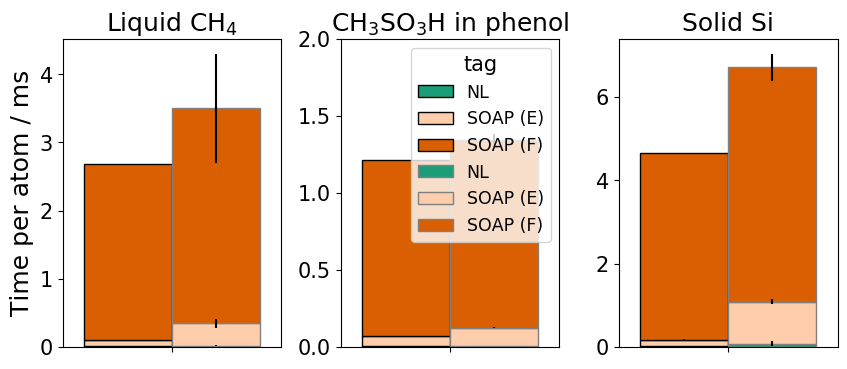

In [247]:
plt.style.use('beamer')
fig, axs = plt.subplots(1, 3, sharey=False, gridspec_kw={'wspace': 0.27})
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_rascal_grad = benchmarks_grads.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si'
}
# I think we can rely on the sorting-by-keys to keep these in the same order...
for ax, (system_name, timing_rascal), (system_name, timing_rascal_grad), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_rascal_grad, timings_bysystem_quip_filter):
    # librascal
    timing_breakdown = timing_rascal.pivot(index='n_sparse', columns='tag', values='mean per atom / ms')
    timing_breakdown = timing_breakdown.sort_index().rename(columns={
        'pred energy': 'GAP (E)',
        'rep': 'SOAP (E)'})[['NL', 'SOAP (E)']].loc[1000:1000]
    timing_breakdown_grad = timing_rascal_grad.pivot(index='n_sparse', columns='tag', values='mean per atom / ms').sort_index().rename(
        columns={'rep with grad': 'SOAP (E+F)', 'pred energy': 'GAP', 'pred forces': 'GAP (F)'}).loc[1000:1000]
    timing_breakdown = timing_breakdown.assign(
        **{'SOAP (F)': (lambda x: timing_breakdown_grad['SOAP (E+F)'] - x['SOAP (E)'])}
    )
    timing_breakdown_stdev = timing_rascal.pivot(index='n_sparse', columns='tag', values='stdev per atom / ms').rename(
        columns={'pred energy': 'GAP', 'rep': 'SOAP (E)'})
    timing_breakdown_stdev_grad = timing_rascal_grad.pivot(index='n_sparse', columns='tag', values='stdev per atom / ms').sort_index().rename(
        columns={'rep with grad': 'SOAP (E+F)', 'pred energy': 'GAP', 'pred forces': 'GAP (F)'}).loc[1000:1000]
    timing_breakdown_stdev.assign(**{'SOAP (F)': timing_breakdown_stdev_grad['SOAP (E+F)']})
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4,
                              #xlabel='$N_\\mathrm{basis}$',
                              ylabel='Time per atom / ms',
                              legend=(system_name == 'methane_sulfonic'),
                              color={'NL': palette_dark[0], 'SOAP (E)': palette_pastel[1],
                                     'SOAP (F)': palette_dark[1]},
                              yerr=timing_breakdown_stdev,
                              align='edge', edgecolor='k')
    
    # QUIP
    timing = timing_quip.set_index('n_sparse').sort_index()
    timing_breakdown = timing[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                              ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
    timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                     'energy_soap_timesub_peratom_mean': 'SOAP (E)'},
                                     inplace=True)
    timing_breakdown = timing_breakdown.assign(
        **{'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
           'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)}
        )[['NL', 'SOAP (E)', 'SOAP (F)']].loc[1000:1000] * 1000
    timing_errs = timing.rename(
        columns={'energy_soap_timesub_peratom_std': 'SOAP (E)',
                 'force_soap_timesub_peratom_std': 'SOAP (F)',
                 'energy_calc_connect_timesub_peratom_std': 'NL'})[['NL', 'SOAP (E)', 'SOAP (F)']] * 1000
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4,
                              #xlabel='$N_\\mathrm{basis}$',
                              xlabel='',
                              ylabel=('Time per atom / ms' if system_name == 'methane_liquid' else ''),
                              color={'NL': palette_dark[0], 'SOAP (E)': palette_pastel[1],
                                     'SOAP (F)': palette_dark[1]},
                              yerr=timing_errs,
                              align='edge', legend=(system_name == 'methane_sulfonic'),
                              edgecolor='gray')
    ax.set_xticklabels([])
    if system_name == 'methane_sulfonic':
        ax.set_ylim(0, 2.0)
    #ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
    #ax.legend().set_title(None)
    ax.set_title(display_names[system_name])
    ax.set_xlim(-0.5, 0.5)
fig.set_size_inches((10, 4))
fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_soap_ef.pdf', bbox_inches='tight')

...that's not exactly a spectacular improvement.

### With optimized forces

In [49]:
descriptor_sizes_quip = {
    # QM9: 5 species
    'qm9': 10 * (12*5 * (12*5 + 1))//2,
    # methane liquid: 2 species
    'methane_liquid': 7 * (8*2 * (8*2 + 1))//2,
    # methane sulfonic: 4 species
    'methane_sulfonic': 7 * (8*4 * (8*4 + 1))//2,
    # silicon bulk: why didn't I just write a damn function for this
    'silicon_bulk': 13 * (10 * 11)//2,
    'molecular_crystals': 10 * (9*4 * (9*4 + 1))//2
}
n_features_tot = {'silicon_bulk': 1300, 'methane_liquid': 1344, 'methane_sulfonic': 4480, 'qm9': 21600, 'molecular_crystals': 8100}

In [353]:
#n_features = {'silicon_bulk': 909, 'qm9': 15119}
fopt_project = signac.get_project('../rascal_benchmarks_versions/scripts_all_5/model/')
benchmarks_fopt = []
for name in systems:
    for job in fopt_project.find_jobs({'name': name,
                                       'feature_subselection.Nselect': descriptor_sizes_quip[name],
                                       'train_with_grad': False,
                                       'grads_timing': True
                                      }):
        for bmark in job.doc.benchmark:
            bmark = bmark.copy()
            bmark['mean per atom / ms'] = bmark['mean'] / bmark['n_atoms'] * 1000
            bmark['stdev per atom / ms'] = bmark['stdev'] / bmark['n_atoms'] * 1000
            bmark['n_sparse'] = sum(val for key, val in job.sp.sparse_point_subselection.Nselect.items())
            n_feat = job.sp.feature_subselection.Nselect
            bmark['n_feat'] = int(n_feat if n_feat is not None else n_features_tot)
            benchmarks_fopt.append(bmark)
benchmarks_fopt = pandas.DataFrame(benchmarks_fopt)

In [354]:
benchmarks_fopt.loc[benchmarks_fopt['name'] == 'silicon_bulk']

,tag,mean,stdev,min,max,samples,name,n_atoms,mean per atom / ms,stdev per atom / ms,n_sparse,n_feat
64,NL,0.020364,0.001110,0.019505,0.022538,"[0.02253763936460018, 0.020062634721398354, 0....",silicon_bulk,1458,0.013967,0.000761,500,715
65,rep with grad,5.207668,0.124931,5.072363,5.366911,"[5.3669107630848885, 5.34075640141964, 5.17569...",silicon_bulk,1458,3.571789,0.085687,500,715
66,pred energy,0.190821,0.007231,0.182255,0.202024,"[0.18680998869240284, 0.20202409196645021, 0.1...",silicon_bulk,1458,0.130879,0.004960,500,715
67,pred forces,0.463895,0.014114,0.444754,0.478331,"[0.46987989358603954, 0.478331190533936, 0.444...",silicon_bulk,1458,0.318172,0.009681,500,715
68,NL,0.021644,0.001372,0.020238,0.023917,"[0.022485170513391495, 0.020237643271684647, 0...",silicon_bulk,1458,0.014845,0.000941,200,715
69,rep with grad,5.379644,0.027169,5.346494,5.409216,"[5.34649424534291, 5.388135428540409, 5.405763...",silicon_bulk,1458,3.689742,0.018635,200,715
70,pred energy,0.062523,0.000909,0.061584,0.063952,"[0.061602720990777016, 0.06310455780476332, 0....",silicon_bulk,1458,0.042883,0.000624,200,715
71,pred forces,0.228182,0.005823,0.223568,0.239637,"[0.22500572353601456, 0.22602091915905476, 0.2...",silicon_bulk,1458,0.156504,0.003994,200,715
72,NL,0.019660,0.000416,0.019371,0.020479,"[0.019370938651263714, 0.019586815498769283, 0...",silicon_bulk,1458,0.013484,0.000285,2000,715
73,rep with grad,5.233453,0.080043,5.122226,5.345504,"[5.165015305392444, 5.258953433483839, 5.34550...",silicon_bulk,1458,3.589474,0.054899,2000,715


/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


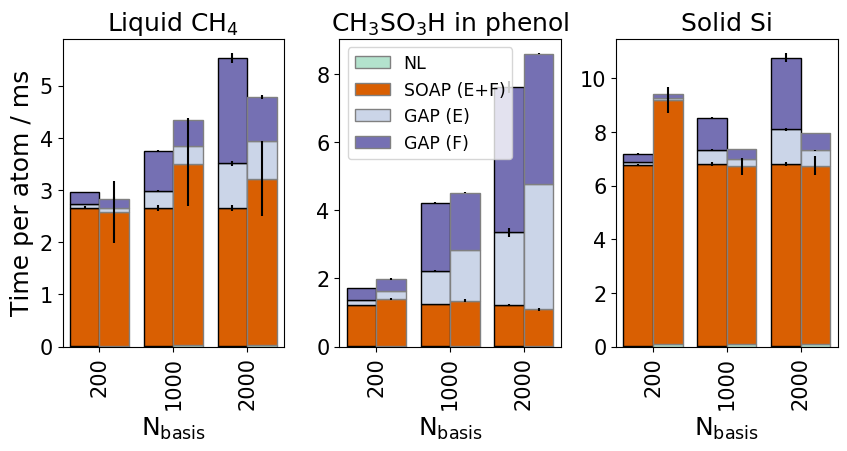

In [235]:
plt.style.use('beamer')
fig, axs = plt.subplots(1, 3, sharey=False, gridspec_kw={'wspace': 0.25})
timings_bysystem_rascal = benchmarks_fopt.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)
# I think we can rely on the sorting-by-keys to keep these in the same order...
for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
    # librascal
    timing_breakdown = timing_rascal.pivot(index='n_sparse', columns='tag', values='mean per atom / ms')
    timing_breakdown_stdev = timing_rascal.pivot(index='n_sparse', columns='tag', values='stdev per atom / ms')
    timing_breakdown = timing_breakdown.sort_index().rename(columns={
        'pred energy': 'GAP (E)',
        'pred forces': 'GAP (F)',
        'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']].loc[n_basis[system_name]]
    timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
        'pred energy': 'GAP (E)',
        'pred forces': 'GAP (F)',
        'rep with grad': 'SOAP (E+F)'
    })
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms', yerr=timing_breakdown_stdev,
                              color={'NL': palette_pastel[0], 'SOAP (E+F)': palette_dark[1],
                                     'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                              legend=False, align='edge', edgecolor='k')
    
    # QUIP
    timing = timing_quip.set_index('n_sparse').sort_index()
    timing_breakdown = timing[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                              ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
    timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                     'force_soap_timesub_peratom_mean': 'SOAP (E+F)',
                                     'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                     inplace=True)
    timing_breakdown = timing_breakdown.assign(
        **{
           #'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
           'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
           'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
    timing_breakdown = timing_breakdown[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']].loc[n_basis[system_name]] * 1000
    timing_errs = timing.rename(
        columns={'force_soap_timesub_peratom_std': 'SOAP (E+F)',
                 'energy_gap_timesub_peratom_std': 'GAP (E)',
                 'force_gap_timesub_peratom_std': 'GAP (F)',
    }).loc[n_basis[system_name]] * 1000
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, yerr=timing_errs,
                              ylabel=('Time per atom / ms' if system_name == 'methane_liquid' else ''),
                              xlabel='$N_\\mathrm{basis}$',
                              color={'NL': palette_pastel[0], 'SOAP (E+F)': palette_dark[1],
                                     'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                              legend=(system_name == 'methane_sulfonic'),
                              align='edge', edgecolor='gray')
    ax.set_title(display_names[system_name])
    ax.set_xlim(-0.5, 2.5)
fig.set_size_inches((10, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_overall_fopt.pdf', bbox_inches='tight')

Just Si, with new QUIP timings

In [311]:
systems_nl_groups = {d['system_name']: (d['system_name'], d['n_max'], d['l_max']) for d in systems_nlparams}

In [356]:
n_basis = [100, 200, 500, 1000, 2000, 5000, 9000]

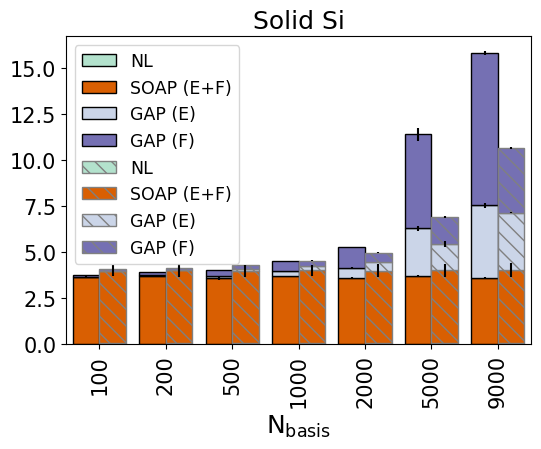

In [357]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False, gridspec_kw={'wspace': 0.25})
timings_bysystem_rascal = benchmarks_fopt.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si'
}
# I think we can rely on the sorting-by-keys to keep these in the same order...
#for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
fig = plt.figure()
ax = fig.gca()
system_name = 'silicon_bulk'
# librascal
timing_rascal = timings_bysystem_rascal.get_group(system_name)
timing_breakdown = timing_rascal.pivot(index='n_sparse', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_sparse', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']].loc[n_basis]
timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'
}).loc[n_basis]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms', yerr=timing_breakdown_stdev,
                          color={'NL': palette_pastel[0], 'SOAP (E+F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          legend=False, align='edge', edgecolor='k')
# QUIP
timing_quip = timings_bysystem_quip.get_group(systems_nl_groups[system_name])
timing = timing_quip.set_index('n_sparse').sort_index()
timing_breakdown = timing[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'force_soap_timesub_peratom_mean': 'SOAP (E+F)',
                                 'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                 inplace=True)
timing_breakdown = timing_breakdown.assign(
    **{
       #'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
       'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
       'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
timing_breakdown = timing_breakdown[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']] * 1000
timing_errs = timing.rename(
    columns={'force_soap_timesub_peratom_std': 'SOAP (E+F)',
             'energy_gap_timesub_peratom_std': 'GAP (E)',
             'force_gap_timesub_peratom_std': 'GAP (F)',
}) * 1000
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, yerr=timing_errs,
                          ylabel=('Time per atom / ms' if system_name == 'methane_liquid' else ''),
                          xlabel='$N_\\mathrm{basis}$',
                          color={'NL': palette_pastel[0], 'SOAP (E+F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          legend=(system_name == 'methane_sulfonic'),
                          align='edge', edgecolor='gray', hatch=r'\\')
#ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
ax.legend().set_title(None)
ax.set_title(display_names[system_name])
ax.set_xlim(-0.5, 6.5)
fig.set_size_inches((6, 4))
#fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_overall_eonly.pdf', bbox_inches='tight')

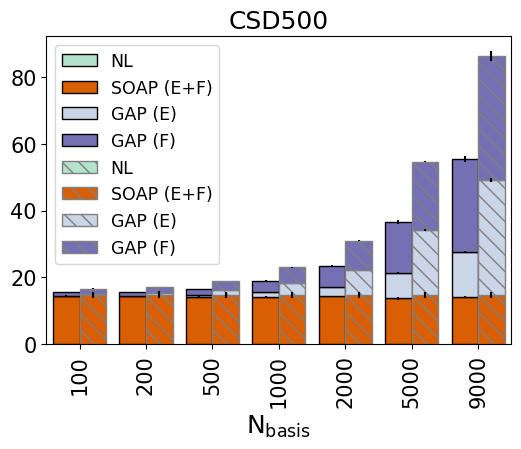

In [370]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False, gridspec_kw={'wspace': 0.25})
timings_bysystem_rascal = benchmarks_fopt.groupby('name')
timings_bysystem_quip = timings_quipnew.groupby(['system_name', 'n_max', 'l_max'])
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si',
    'molecular_crystals': 'CSD500'
}
# I think we can rely on the sorting-by-keys to keep these in the same order...
#for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
fig = plt.figure()
ax = fig.gca()
system_name = 'molecular_crystals'
# librascal
timing_rascal = timings_bysystem_rascal.get_group(system_name)
timing_breakdown = timing_rascal.pivot(index='n_sparse', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_sparse', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']].loc[n_basis]
timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'
}).loc[n_basis]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms', yerr=timing_breakdown_stdev,
                          color={'NL': palette_pastel[0], 'SOAP (E+F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          legend=False, align='edge', edgecolor='k')
# QUIP
timing_quip = timings_bysystem_quip.get_group(systems_nl_groups[system_name])
timing = timing_quip.set_index('n_sparse').sort_index()
timing_breakdown = timing[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'force_soap_timesub_peratom_mean': 'SOAP (E+F)',
                                 'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                 inplace=True)
timing_breakdown = timing_breakdown.assign(
    **{
       #'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
       'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
       'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
timing_breakdown = timing_breakdown[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']] * 1000
timing_errs = timing.rename(
    columns={'force_soap_timesub_peratom_std': 'SOAP (E+F)',
             'energy_gap_timesub_peratom_std': 'GAP (E)',
             'force_gap_timesub_peratom_std': 'GAP (F)',
}) * 1000
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, yerr=timing_errs,
                          ylabel=('Time per atom / ms' if system_name == 'methane_liquid' else ''),
                          xlabel='$N_\\mathrm{basis}$',
                          color={'NL': palette_pastel[0], 'SOAP (E+F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          legend=(system_name == 'methane_sulfonic'),
                          align='edge', edgecolor='gray', hatch=r'\\')
#ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
ax.legend().set_title(None)
ax.set_title(display_names[system_name])
ax.set_xlim(-0.5, 6.5)
fig.set_size_inches((6, 4))
#fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_overall_eonly.pdf', bbox_inches='tight')

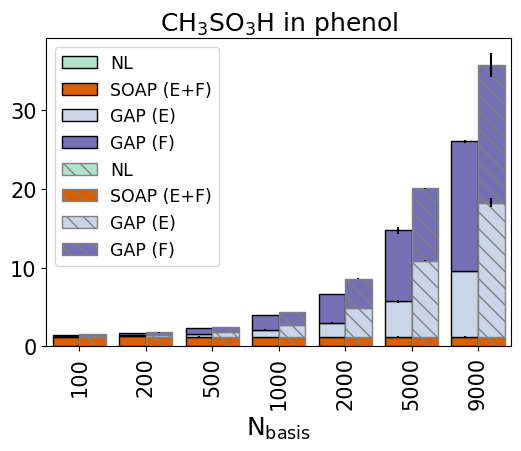

In [371]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False, gridspec_kw={'wspace': 0.25})
timings_bysystem_rascal = benchmarks_fopt.groupby('name')
timings_bysystem_quip = timings_quipnew.groupby(['system_name', 'n_max', 'l_max'])
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si',
    'molecular_crystals': 'CSD500'
}
# I think we can rely on the sorting-by-keys to keep these in the same order...
#for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
fig = plt.figure()
ax = fig.gca()
system_name = 'methane_sulfonic'
# librascal
timing_rascal = timings_bysystem_rascal.get_group(system_name)
timing_breakdown = timing_rascal.pivot(index='n_sparse', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_sparse', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']].loc[n_basis]
timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'
}).loc[n_basis]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms', yerr=timing_breakdown_stdev,
                          color={'NL': palette_pastel[0], 'SOAP (E+F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          legend=False, align='edge', edgecolor='k')
# QUIP
timing_quip = timings_bysystem_quip.get_group(systems_nl_groups[system_name])
timing = timing_quip.set_index('n_sparse').sort_index()
timing_breakdown = timing[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'force_soap_timesub_peratom_mean': 'SOAP (E+F)',
                                 'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                 inplace=True)
timing_breakdown = timing_breakdown.assign(
    **{
       #'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
       'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
       'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
timing_breakdown = timing_breakdown[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']] * 1000
timing_errs = timing.rename(
    columns={'force_soap_timesub_peratom_std': 'SOAP (E+F)',
             'energy_gap_timesub_peratom_std': 'GAP (E)',
             'force_gap_timesub_peratom_std': 'GAP (F)',
}) * 1000
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, yerr=timing_errs,
                          ylabel=('Time per atom / ms' if system_name == 'methane_liquid' else ''),
                          xlabel='$N_\\mathrm{basis}$',
                          color={'NL': palette_pastel[0], 'SOAP (E+F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          legend=(system_name == 'methane_sulfonic'),
                          align='edge', edgecolor='gray', hatch=r'\\')
#ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
ax.legend().set_title(None)
ax.set_title(display_names[system_name])
ax.set_xlim(-0.5, 6.5)
fig.set_size_inches((6, 4))
#fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_overall_eonly.pdf', bbox_inches='tight')

----

### SOAP+GAP with feature sparsification

Feature sizes in librascal (total):

In [393]:
# QM9: 5 species
12**2 * 10 * (5*3)

21600

In [403]:
# methane liquid: 2 species
8**2 * 7 * (1*3)

1344

In [392]:
# methane sulfonic: 4 species
8**2 * 7 * (2*5)

4480

In [155]:
# silicon bulk: 1 species
10**2 * 13

1300

In [48]:
# molecular crystals: 4 species
9**2 * 10 * (2*5)

8100

And in QUIP:

In [49]:
descriptor_sizes_quip = {
    # QM9: 5 species
    'qm9': 10 * (12*5 * (12*5 + 1))//2,
    # methane liquid: 2 species
    'methane_liquid': 7 * (8*2 * (8*2 + 1))//2,
    # methane sulfonic: 4 species
    'methane_sulfonic': 7 * (8*4 * (8*4 + 1))//2,
    # silicon bulk: why didn't I just write a damn function for this
    'silicon_bulk': 13 * (10 * 11)//2,
    'molecular_crystals': 10 * (9*4 * (9*4 + 1))//2
}

In [50]:
descriptor_sizes_quip

{'qm9': 18300,
 'methane_liquid': 952,
 'methane_sulfonic': 3696,
 'silicon_bulk': 715,
 'molecular_crystals': 6660}

_Without_ gradients

In [358]:
n_features_tot = {'silicon_bulk': 1300, 'methane_liquid': 1344, 'methane_sulfonic': 4480, 'qm9': 21600, 'molecular_crystals': 8100}
benchmarks = []
fopt_project = signac.get_project('../rascal_benchmarks_versions/scripts_all_5/model/')
for name in systems:
    for job in fopt_project.find_jobs({'name': name,
                                         #'feature_subselection.Nselect': None,
                                         'train_with_grad': False,
                                         'grads_timing': False
                                        }):
        if not job.doc:
            continue
        for bmark in job.doc.benchmark:
            bmark = bmark.copy()
            bmark['mean per atom / ms'] = bmark['mean'] / bmark['n_atoms'] * 1000
            bmark['stdev per atom / ms'] = bmark['stdev'] / bmark['n_atoms'] * 1000
            bmark['n_sparse'] = sum(val for key, val in job.sp.sparse_point_subselection.Nselect.items())
            Nselect = job.sp.feature_subselection.Nselect
            bmark['n_features'] = int(Nselect) if Nselect is not None else n_features_tot[name]
            benchmarks.append(bmark)
benchmarks = pandas.DataFrame(benchmarks)
benchmarks = benchmarks.loc[lambda df: df['n_sparse'] == 2000, :]

In [165]:
from pprint import pprint

The `model_4` energy-only timings are much lower than the equivalent `model_5` timings; what's the difference in parameters?

In [168]:
model_4 = signac.get_project('../rascal_benchmarks_versions/model_4/')
print("Model_4")
sppoints = []
for job in model_4.find_jobs({'name': 'methane_sulfonic',
                              'train_with_grad': False,
                              'grads_timing': False,
                              'feature_subselection.Nselect': None,
                              #'sparse_point_subselection.Nselect.1': 2250
                             }):
    sppoints.append(job.sp.sparse_point_subselection)
pprint(sorted(sppoints, key=lambda d: d['Nselect']['1']))
model_5 = signac.get_project('../rascal_benchmarks_versions/model_5/')
print("Model_5")
sppoints = []
for job in model_5.find_jobs({'name': 'methane_sulfonic',
                              'train_with_grad': False,
                              'grads_timing': False,
                              'feature_subselection.Nselect': None,
                              #'sparse_point_subselection.Nselect.1': 2250
                             }):
    sppoints.append(job.sp.sparse_point_subselection)
pprint(sorted(sppoints, key=lambda d: d['Nselect']['1']))

Model_4
[{'Nselect': {'1': 25, '6': 25, '8': 25, '16': 25}, 'act_on': 'sample per species', 'seed': 10},
 {'Nselect': {'1': 50, '6': 50, '8': 50, '16': 50}, 'act_on': 'sample per species', 'seed': 10},
 {'Nselect': {'1': 125, '6': 125, '8': 125, '16': 125}, 'act_on': 'sample per species', 'seed': 10},
 {'Nselect': {'1': 250, '6': 250, '8': 250, '16': 250}, 'act_on': 'sample per species', 'seed': 10},
 {'Nselect': {'1': 500, '6': 500, '8': 500, '16': 500}, 'act_on': 'sample per species', 'seed': 10},
 {'Nselect': {'1': 1250, '6': 1250, '8': 1250, '16': 1250}, 'act_on': 'sample per species', 'seed': 10},
 {'Nselect': {'1': 1750, '6': 1750, '8': 1750, '16': 1750}, 'act_on': 'sample per species', 'seed': 10},
 {'Nselect': {'1': 2250, '6': 2250, '8': 2250, '16': 2250}, 'act_on': 'sample per species', 'seed': 10}]
Model_5
[{'Nselect': {'1': 46, '6': 43, '8': 10, '16': 1}, 'act_on': 'sample per species', 'seed': 10},
 {'Nselect': {'1': 93, '6': 86, '8': 20, '16': 1}, 'act_on': 'sample per spe

In [359]:
# Just an alias for later
benchmarks_nograd = benchmarks

In [132]:
benchmarks.loc[benchmarks['name'] == 'methane_liquid'].sort_values('n_features')

,tag,mean,stdev,min,max,samples,name,n_atoms,mean per atom / ms,stdev per atom / ms,n_sparse,n_features
176,pred energy,0.038362,0.000843,0.037853,0.040045,"[0.04004501271992922, 0.037939885165542364, 0....",methane_liquid,3645,0.010525,0.000231,2000,19
174,NL,0.030297,0.000170,0.030134,0.030618,"[0.030312241055071354, 0.030224730260670185, 0...",methane_liquid,3645,0.008312,0.000047,2000,19
175,rep,0.296267,0.003722,0.293156,0.303550,"[0.2948828930966556, 0.2942589349113405, 0.295...",methane_liquid,3645,0.081280,0.001021,2000,19
95,pred energy,0.061242,0.001419,0.060326,0.064071,"[0.060548261273652315, 0.06032649800181389, 0....",methane_liquid,3645,0.016802,0.000389,2000,47
93,NL,0.029677,0.000178,0.029386,0.029882,"[0.029386116191744804, 0.029676249716430902, 0...",methane_liquid,3645,0.008142,0.000049,2000,47
94,rep,0.292168,0.005252,0.287678,0.301862,"[0.2890422730706632, 0.2935657282359898, 0.288...",methane_liquid,3645,0.080156,0.001441,2000,47
33,NL,0.039261,0.004345,0.030753,0.042349,"[0.03075302578508854, 0.042348746210336685, 0....",methane_liquid,3645,0.010771,0.001192,2000,95
34,rep,0.312012,0.006726,0.305216,0.321332,"[0.3052161540836096, 0.3213319331407547, 0.305...",methane_liquid,3645,0.085600,0.001845,2000,95
35,pred energy,0.117403,0.002024,0.115798,0.121300,"[0.11579782189801335, 0.11689273687079549, 0.1...",methane_liquid,3645,0.032209,0.000555,2000,95
25,rep,0.301339,0.004292,0.297577,0.309677,"[0.3096769191324711, 0.2988764429464936, 0.300...",methane_liquid,3645,0.082672,0.001178,2000,190


/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


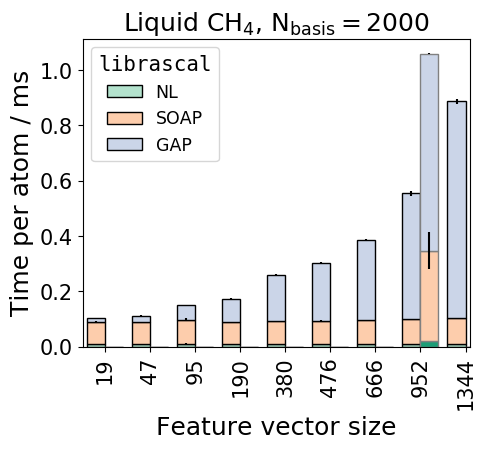

In [173]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si'
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)

system_name = 'methane_liquid'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group(('methane_liquid', 8, 6))

ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP',
    'rep': 'SOAP'})[['NL', 'SOAP', 'GAP']]
timing_breakdown_stdev = timing_breakdown_stdev.sort_index().rename(
    columns={
        'pred energy': 'GAP',
        'rep': 'SOAP'
    })
timing_breakdown.plot.bar(ax=axb, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_breakdown_stdev,
                          color={'NL': palette_pastel[0], 'SOAP': palette_pastel[1],
                                 'GAP': palette_pastel[2]},
                          align='edge', edgecolor='k')

# QUIP
timing = timing_quip.set_index('n_sparse')
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP',
                                 'energy_gap_timesub_peratom_mean': 'GAP'},
                                 inplace=True)
timing_breakdown = timing_breakdown[['NL', 'SOAP', 'GAP']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP',
             'energy_gap_timesub_peratom_std': 'GAP'}) * 1000
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size',
                          color={'NL': palette_dark[0], 'SOAP': palette_pastel[1],
                                 'GAP': palette_pastel[2]},
                          yerr=timing_errs,
                          align='edge', legend=False, edgecolor='gray')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
#ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
#axl.set_title(display_names[system_name] + ": Components")
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_methane_eonly.pdf', bbox_inches='tight')

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


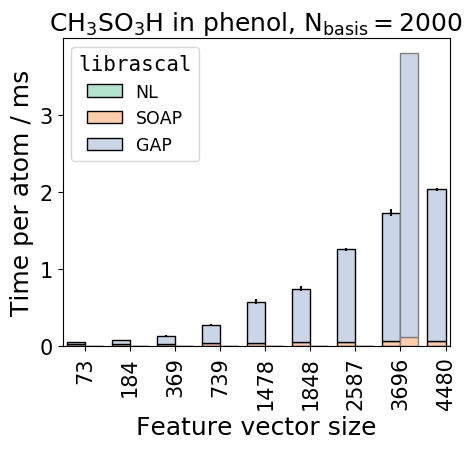

In [136]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si'
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)

system_name = 'methane_sulfonic'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group(('methane_sulfonic', 8, 6))

ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP',
    'rep': 'SOAP'})[['NL', 'SOAP', 'GAP']]
timing_breakdown_stdev = timing_breakdown_stdev.sort_index().rename(
    columns={
        'pred energy': 'GAP',
        'rep': 'SOAP'
    })
timing_breakdown.plot.bar(ax=axb, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_breakdown_stdev,
                          color={'NL': palette_pastel[0], 'SOAP': palette_pastel[1],
                                 'GAP': palette_pastel[2]},
                          align='edge', edgecolor='k')

# QUIP
timing = timing_quip.set_index('n_sparse')
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP',
                                 'energy_gap_timesub_peratom_mean': 'GAP'},
                                 inplace=True)
timing_breakdown = timing_breakdown[['NL', 'SOAP', 'GAP']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP',
             'energy_gap_timesub_peratom_std': 'GAP'}) * 1000
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size',
                          color={'NL': palette_dark[0], 'SOAP': palette_pastel[1],
                                 'GAP': palette_pastel[2]},
                          yerr=timing_errs,
                          align='edge', legend=False, edgecolor='gray')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
#ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
#axl.set_title(display_names[system_name] + ": Components")
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_mesulf_eonly.pdf', bbox_inches='tight')

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


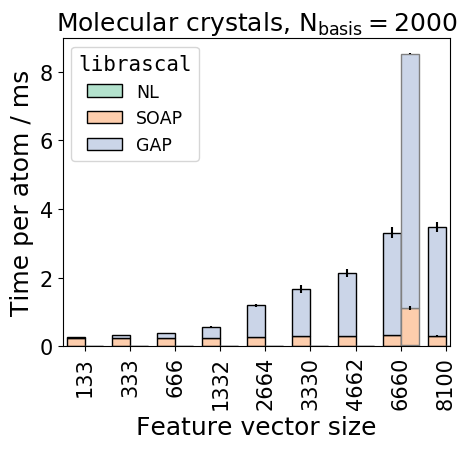

In [129]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si',
    'molecular_crystals': "Molecular crystals"
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)

system_name = 'molecular_crystals'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group(('molecular_crystals', 9, 9))

ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP',
    'rep': 'SOAP'})[['NL', 'SOAP', 'GAP']]
timing_breakdown_stdev = timing_breakdown_stdev.sort_index().rename(
    columns={
        'pred energy': 'GAP',
        'rep': 'SOAP'
    })
timing_breakdown.plot.bar(ax=axb, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_breakdown_stdev,
                          color={'NL': palette_pastel[0], 'SOAP': palette_pastel[1],
                                 'GAP': palette_pastel[2]},
                          align='edge', edgecolor='k')

# QUIP
timing = timing_quip.set_index('n_sparse')
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP',
                                 'energy_gap_timesub_peratom_mean': 'GAP'},
                                 inplace=True)
timing_breakdown = timing_breakdown[['NL', 'SOAP', 'GAP']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP',
             'energy_gap_timesub_peratom_std': 'GAP'}) * 1000
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size',
                          color={'NL': palette_dark[0], 'SOAP': palette_pastel[1],
                                 'GAP': palette_pastel[2]},
                          yerr=timing_errs,
                          align='edge', legend=False, edgecolor='gray')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
#ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
#axl.set_title(display_names[system_name] + ": Components")
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_molcrys_eonly.pdf', bbox_inches='tight')

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


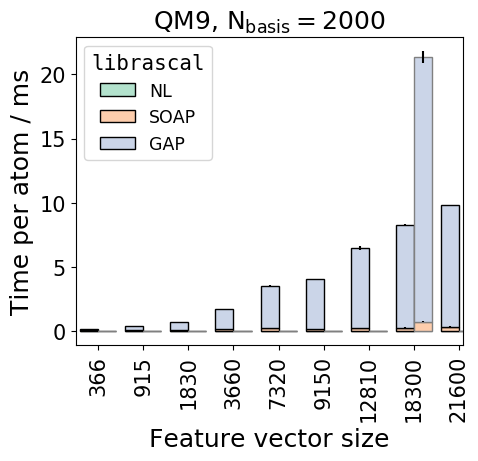

In [115]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si',
    'molecular_crystals': "Molecular crystals",
    'qm9': "QM9"
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)

system_name = 'qm9'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group(('qm9', 12, 9))

ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP',
    'rep': 'SOAP'})[['NL', 'SOAP', 'GAP']]
timing_breakdown_stdev = timing_breakdown_stdev.sort_index().rename(
    columns={
        'pred energy': 'GAP',
        'rep': 'SOAP'
    })
timing_breakdown.plot.bar(ax=axb, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_breakdown_stdev,
                          color={'NL': palette_pastel[0], 'SOAP': palette_pastel[1],
                                 'GAP': palette_pastel[2]},
                          align='edge', edgecolor='k')

# QUIP
timing = timing_quip.set_index('n_sparse')
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP',
                                 'energy_gap_timesub_peratom_mean': 'GAP'},
                                 inplace=True)
timing_breakdown = timing_breakdown[['NL', 'SOAP', 'GAP']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP',
             'energy_gap_timesub_peratom_std': 'GAP'}) * 1000
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size',
                          color={'NL': palette_dark[0], 'SOAP': palette_pastel[1],
                                 'GAP': palette_pastel[2]},
                          yerr=timing_errs,
                          align='edge', legend=False, edgecolor='gray')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
#ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
#axl.set_title(display_names[system_name] + ": Components")
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_qm9_eonly.pdf', bbox_inches='tight')

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


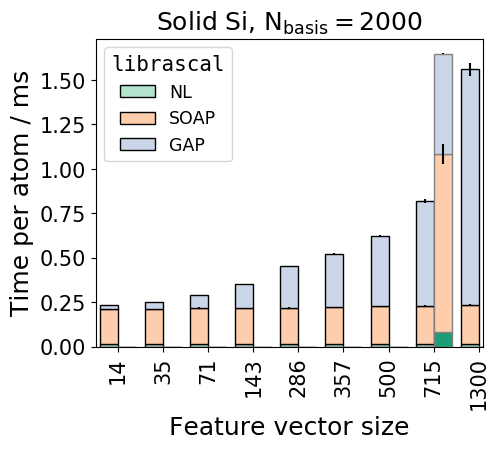

In [116]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si',
    'molecular_crystals': "Molecular crystals"
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)

system_name = 'silicon_bulk'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group(('silicon_bulk', 10, 12))

ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP',
    'rep': 'SOAP'})[['NL', 'SOAP', 'GAP']]
timing_breakdown_stdev = timing_breakdown_stdev.sort_index().rename(
    columns={
        'pred energy': 'GAP',
        'rep': 'SOAP'
    })
timing_breakdown.plot.bar(ax=axb, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_breakdown_stdev,
                          color={'NL': palette_pastel[0], 'SOAP': palette_pastel[1],
                                 'GAP': palette_pastel[2]},
                          align='edge', edgecolor='k')

# QUIP
timing = timing_quip.set_index('n_sparse').loc[2000:2000]
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP',
                                 'energy_gap_timesub_peratom_mean': 'GAP'},
                                 inplace=True)
timing_breakdown = timing_breakdown[['NL', 'SOAP', 'GAP']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP',
             'energy_gap_timesub_peratom_std': 'GAP'}) * 1000
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size',
                          color={'NL': palette_dark[0], 'SOAP': palette_pastel[1],
                                 'GAP': palette_pastel[2]},
                          yerr=timing_errs,
                          align='edge', legend=False, edgecolor='gray')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
#ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
#axl.set_title(display_names[system_name] + ": Components")
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_silicon_eonly.pdf', bbox_inches='tight')

_With_ gradients (and optimized, too)

In [83]:
systems

['methane_liquid',
 'molecular_crystals',
 'silicon_bulk',
 'qm9',
 'methane_sulfonic']

In [86]:
len(fopt_project.find_jobs({'name': 'qm9', 'grads_timing': True, 'train_with_grad': False}))

72

In [360]:
ls ../rascal_benchmarks_versions/

model/  model_4/  model_5/  quip_timings_20210215/  scripts_all_5/


In [361]:
n_features_tot = {'silicon_bulk': 1300, 'methane_liquid': 1344, 'methane_sulfonic': 4480, 'qm9': 21600, 'molecular_crystals': 8100}
fopt_project = signac.get_project('../rascal_benchmarks_versions/scripts_all_5/model/')
benchmarks = []
for name in systems:
    for job in fopt_project.find_jobs({'name': name,
                                        #'feature_subselection.Nselect': None,
                                        'train_with_grad': False,
                                        'grads_timing': True
                                       }):
        if not job.doc:
            continue
        for bmark in job.doc.benchmark:
            bmark = bmark.copy()
            bmark['mean per atom / ms'] = bmark['mean'] / bmark['n_atoms'] * 1000
            bmark['stdev per atom / ms'] = bmark['stdev'] / bmark['n_atoms'] * 1000
            bmark['n_sparse'] = sum(val for key, val in job.sp.sparse_point_subselection.Nselect.items())
            Nselect = job.sp.feature_subselection.Nselect
            bmark['n_features'] = int(Nselect) if Nselect is not None else n_features_tot[name]
            benchmarks.append(bmark)
benchmarks = pandas.DataFrame(benchmarks)
benchmarks = benchmarks.loc[lambda df: df['n_sparse'] == 2000, :]

In [97]:
benchmarks.groupby('name').get_group('qm9')

,tag,mean,stdev,min,max,samples,name,n_atoms,mean per atom / ms,stdev per atom / ms,n_sparse,n_features
868,NL,0.033608,0.042323,0.012235,0.118253,"[0.11825310718268156, 0.012780345045030117, 0....",qm9,1801,0.018661,0.023500,2000,7320
869,rep with grad,6.957742,0.203821,6.707709,7.282026,"[7.282025574706495, 7.087279609404504, 6.89116...",qm9,1801,3.863266,0.113171,2000,7320
870,pred energy,5.754501,0.007848,5.740542,5.762303,"[5.760940815322101, 5.740542444400489, 5.75204...",qm9,1801,3.195170,0.004357,2000,7320
871,pred forces,12.122459,0.098216,11.931994,12.201852,"[12.1443903259933, 12.201851879246533, 12.1425...",qm9,1801,6.730960,0.054534,2000,7320
892,NL,0.032609,0.040249,0.011977,0.113101,"[0.11310141906142235, 0.012293708510696888, 0....",qm9,1801,0.018106,0.022348,2000,366
893,rep with grad,1.679183,0.023026,1.659046,1.722389,"[1.7223886726424098, 1.6829530727118254, 1.659...",qm9,1801,0.932361,0.012785,2000,366
894,pred energy,0.173015,0.001347,0.170789,0.174968,"[0.17496792040765285, 0.17351279128342867, 0.1...",qm9,1801,0.096066,0.000748,2000,366
895,pred forces,0.401606,0.004062,0.396934,0.408670,"[0.4029566468670964, 0.40867035556584597, 0.39...",qm9,1801,0.222991,0.002256,2000,366
896,NL,0.013732,0.001023,0.012697,0.015682,"[0.015682080760598183, 0.012696917168796062, 0...",qm9,1801,0.007625,0.000568,2000,21600
897,rep with grad,16.211799,0.112882,16.066116,16.371904,"[16.371904148720205, 16.16021117847413, 16.312...",qm9,1801,9.001554,0.062677,2000,21600


Liquid methane

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


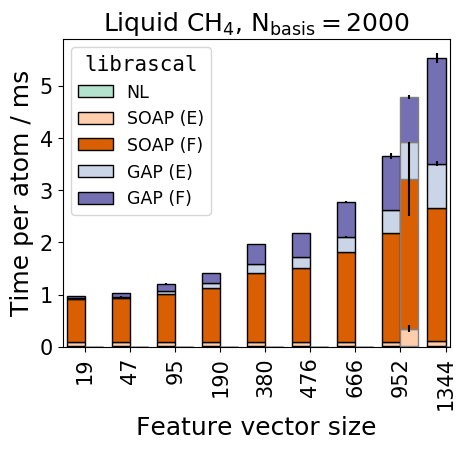

In [118]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si'
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_rascal_nograd = benchmarks_nograd.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)
# I think we can rely on the sorting-by-keys to keep these in the same order...
#for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
system_name = 'methane_liquid'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
timing_rascal_nograd = timings_bysystem_rascal_nograd.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group(('methane_liquid', 8, 6))
ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'
})
timing_breakdown_nograd = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='mean per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown = timing_breakdown.assign(**{
    'SOAP (F)': (lambda x: x['SOAP (E+F)'] - timing_breakdown_nograd['SOAP (E)']),
    'SOAP (E)': timing_breakdown_nograd['SOAP (E)']
})[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_nograd_stdev = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='stdev per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          color={'NL': palette_pastel[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          yerr=timing_breakdown_stdev,align='edge', edgecolor='k')

# QUIP
timing = timing_quip.set_index('n_sparse')
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP (E)',
                                 'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                 inplace=True)
timing_breakdown = timing_breakdown.assign(
    **{'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
       'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
       'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
timing_breakdown = timing_breakdown[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP (E)',
             'force_soap_timesub_peratom_std': 'SOAP (F)',
             'energy_gap_timesub_peratom_std': 'GAP (E)',
             'force_gap_timesub_peratom_std': 'GAP (F)'}) * 1000
# Ugh, did not think this through... ok, this is ugly, but it works
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_errs,
                          color={'NL': palette_dark[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          align='edge', legend=False, edgecolor='gray')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
#fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_featsparse_ef.pdf', bbox_inches='tight')
fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_methane_forces.pdf', bbox_inches='tight')

And try it for another system

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


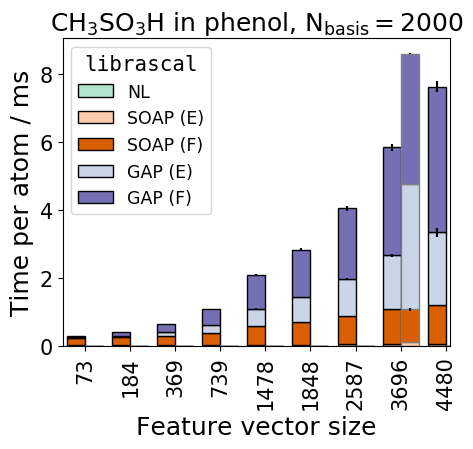

In [119]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si'
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_rascal_nograd = benchmarks_nograd.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)
# I think we can rely on the sorting-by-keys to keep these in the same order...
#for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
system_name = 'methane_sulfonic'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
timing_rascal_nograd = timings_bysystem_rascal_nograd.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group((system_name, 8, 6))
ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'
})
timing_breakdown_nograd = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='mean per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown = timing_breakdown.assign(**{
    'SOAP (F)': (lambda x: x['SOAP (E+F)'] - timing_breakdown_nograd['SOAP (E)']),
    'SOAP (E)': timing_breakdown_nograd['SOAP (E)']
})[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_nograd_stdev = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='stdev per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          color={'NL': palette_pastel[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          yerr=timing_breakdown_stdev,align='edge', edgecolor='k')

# QUIP
timing = timing_quip.set_index('n_sparse')
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP (E)',
                                 'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                 inplace=True)
timing_breakdown = timing_breakdown.assign(
    **{'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
       'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
       'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
timing_breakdown = timing_breakdown[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP (E)',
             'force_soap_timesub_peratom_std': 'SOAP (F)',
             'energy_gap_timesub_peratom_std': 'GAP (E)',
             'force_gap_timesub_peratom_std': 'GAP (F)'}) * 1000
# Ugh, did not think this through... ok, this is ugly, but it works
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_errs,
                          color={'NL': palette_dark[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          align='edge', legend=False, edgecolor='gray')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
#fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_featsparse_ef_mesulf.pdf', bbox_inches='tight')
fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_mesulf_forces.pdf', bbox_inches='tight')

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


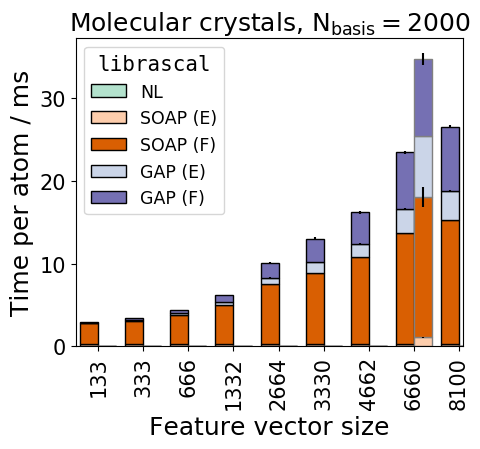

In [120]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si',
    'molecular_crystals': 'Molecular crystals',
    'qm9': "QM9"
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_rascal_nograd = benchmarks_nograd.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)
# I think we can rely on the sorting-by-keys to keep these in the same order...
#for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
system_name = 'molecular_crystals'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
timing_rascal_nograd = timings_bysystem_rascal_nograd.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group((system_name, 9, 9))
ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'
})
timing_breakdown_nograd = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='mean per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown = timing_breakdown.assign(**{
    'SOAP (F)': (lambda x: x['SOAP (E+F)'] - timing_breakdown_nograd['SOAP (E)']),
    'SOAP (E)': timing_breakdown_nograd['SOAP (E)']
})[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_nograd_stdev = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='stdev per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          color={'NL': palette_pastel[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          yerr=timing_breakdown_stdev,align='edge', edgecolor='k')

# QUIP
timing = timing_quip.set_index('n_sparse')
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP (E)',
                                 'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                 inplace=True)
timing_breakdown = timing_breakdown.assign(
    **{'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
       'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
       'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
timing_breakdown = timing_breakdown[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP (E)',
             'force_soap_timesub_peratom_std': 'SOAP (F)',
             'energy_gap_timesub_peratom_std': 'GAP (E)',
             'force_gap_timesub_peratom_std': 'GAP (F)'}) * 1000
# Ugh, did not think this through... ok, this is ugly, but it works
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_errs,
                          color={'NL': palette_dark[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          align='edge', legend=False, edgecolor='gray')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
#fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_featsparse_ef_mesulf.pdf', bbox_inches='tight')
fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_molcrys_forces.pdf', bbox_inches='tight')

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


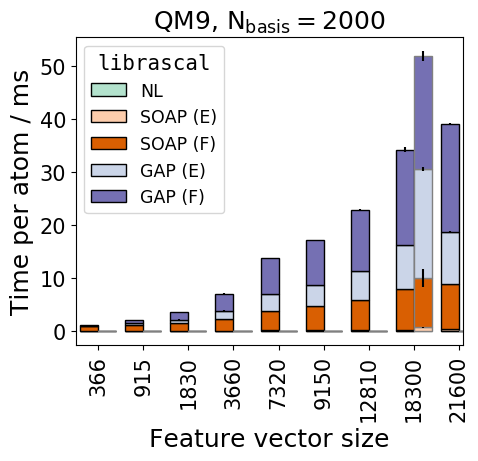

In [121]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si',
    'molecular_crystals': 'Molecular crystals',
    'qm9': "QM9"
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_rascal_nograd = benchmarks_nograd.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)
# I think we can rely on the sorting-by-keys to keep these in the same order...
#for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
system_name = 'qm9'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
timing_rascal_nograd = timings_bysystem_rascal_nograd.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group((system_name, 12, 9))
ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'
})
timing_breakdown_nograd = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='mean per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown = timing_breakdown.assign(**{
    'SOAP (F)': (lambda x: x['SOAP (E+F)'] - timing_breakdown_nograd['SOAP (E)']),
    'SOAP (E)': timing_breakdown_nograd['SOAP (E)']
})[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_nograd_stdev = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='stdev per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          color={'NL': palette_pastel[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          yerr=timing_breakdown_stdev,align='edge', edgecolor='k')

# QUIP
timing = timing_quip.set_index('n_sparse')
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP (E)',
                                 'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                 inplace=True)
timing_breakdown = timing_breakdown.assign(
    **{'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
       'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
       'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
timing_breakdown = timing_breakdown[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP (E)',
             'force_soap_timesub_peratom_std': 'SOAP (F)',
             'energy_gap_timesub_peratom_std': 'GAP (E)',
             'force_gap_timesub_peratom_std': 'GAP (F)'}) * 1000
# Ugh, did not think this through... ok, this is ugly, but it works
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_errs,
                          color={'NL': palette_dark[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          align='edge', legend=False, edgecolor='gray')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
#fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_featsparse_ef_mesulf.pdf', bbox_inches='tight')
fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_qm9_forces.pdf', bbox_inches='tight')

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


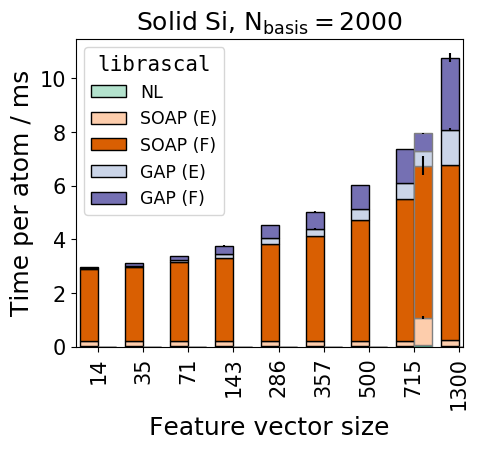

In [122]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si'
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_rascal_nograd = benchmarks_nograd.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)
# I think we can rely on the sorting-by-keys to keep these in the same order...
#for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
system_name = 'silicon_bulk'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
timing_rascal_nograd = timings_bysystem_rascal_nograd.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group((system_name, 10, 12))
ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'
})
timing_breakdown_nograd = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='mean per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown = timing_breakdown.assign(**{
    'SOAP (F)': (lambda x: x['SOAP (E+F)'] - timing_breakdown_nograd['SOAP (E)']),
    'SOAP (E)': timing_breakdown_nograd['SOAP (E)']
})[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_nograd_stdev = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='stdev per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          color={'NL': palette_pastel[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          yerr=timing_breakdown_stdev,align='edge', edgecolor='k')

# QUIP
# Oh nooo... prevent conflict in case n_sparse coincides with an n_features
timing = timing_quip.set_index('n_sparse').loc[2000:2000]
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP (E)',
                                 'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                 inplace=True)
timing_breakdown = timing_breakdown.assign(
    **{'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
       'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
       'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
timing_breakdown = timing_breakdown[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP (E)',
             'force_soap_timesub_peratom_std': 'SOAP (F)',
             'energy_gap_timesub_peratom_std': 'GAP (E)',
             'force_gap_timesub_peratom_std': 'GAP (F)'}) * 1000
# Ugh, did not think this through... ok, this is ugly, but it works
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_errs,
                          color={'NL': palette_dark[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          align='edge', legend=False, edgecolor='gray')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
#fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_featsparse_ef_si.pdf', bbox_inches='tight')
fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_silicon_forces.pdf', bbox_inches='tight')

## With new QUIP timings:

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


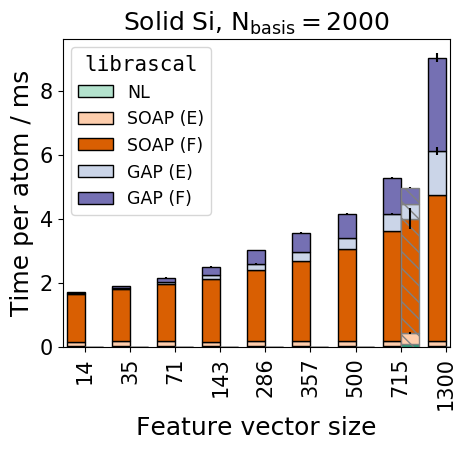

In [362]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si'
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_rascal_nograd = benchmarks_nograd.groupby('name')
timings_bysystem_quip = timings_quipnew.groupby(['system_name', 'n_max', 'l_max'])

#for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
system_name = 'silicon_bulk'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
timing_rascal_nograd = timings_bysystem_rascal_nograd.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group(systems_nl_groups[system_name])
ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'
})
timing_breakdown_nograd = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='mean per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown = timing_breakdown.assign(**{
    'SOAP (F)': (lambda x: x['SOAP (E+F)'] - timing_breakdown_nograd['SOAP (E)']),
    'SOAP (E)': timing_breakdown_nograd['SOAP (E)']
})[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_nograd_stdev = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='stdev per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          color={'NL': palette_pastel[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          yerr=timing_breakdown_stdev,align='edge', edgecolor='k')

# QUIP
# Oh nooo... prevent conflict in case n_sparse coincides with an n_features
timing = timing_quip.set_index('n_sparse').loc[2000:2000]
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP (E)',
                                 'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                 inplace=True)
timing_breakdown = timing_breakdown.assign(
    **{'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
       'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
       'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
timing_breakdown = timing_breakdown[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP (E)',
             'force_soap_timesub_peratom_std': 'SOAP (F)',
             'energy_gap_timesub_peratom_std': 'GAP (E)',
             'force_gap_timesub_peratom_std': 'GAP (F)'}) * 1000
# Ugh, did not think this through... ok, this is ugly, but it works
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_errs,
                          color={'NL': palette_dark[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          align='edge', legend=False, edgecolor='gray', hatch=r'\\')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
#fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_featsparse_ef_si.pdf', bbox_inches='tight')
#fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_silicon_forces.pdf', bbox_inches='tight')

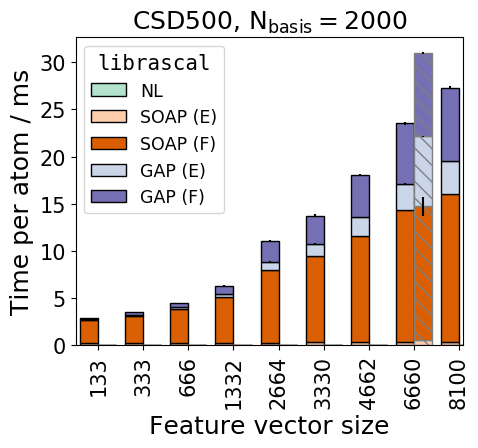

In [372]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si',
    'molecular_crystals': 'CSD500'
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_rascal_nograd = benchmarks_nograd.groupby('name')
timings_bysystem_quip = timings_quipnew.groupby(['system_name', 'n_max', 'l_max'])

#for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
system_name = 'molecular_crystals'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
timing_rascal_nograd = timings_bysystem_rascal_nograd.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group(systems_nl_groups[system_name])
ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'
})
timing_breakdown_nograd = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='mean per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown = timing_breakdown.assign(**{
    'SOAP (F)': (lambda x: x['SOAP (E+F)'] - timing_breakdown_nograd['SOAP (E)']),
    'SOAP (E)': timing_breakdown_nograd['SOAP (E)']
})[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_nograd_stdev = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='stdev per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          color={'NL': palette_pastel[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          yerr=timing_breakdown_stdev,align='edge', edgecolor='k')

# QUIP
# Oh nooo... prevent conflict in case n_sparse coincides with an n_features
timing = timing_quip.set_index('n_sparse').loc[2000:2000]
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP (E)',
                                 'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                 inplace=True)
timing_breakdown = timing_breakdown.assign(
    **{'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
       'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
       'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
timing_breakdown = timing_breakdown[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP (E)',
             'force_soap_timesub_peratom_std': 'SOAP (F)',
             'energy_gap_timesub_peratom_std': 'GAP (E)',
             'force_gap_timesub_peratom_std': 'GAP (F)'}) * 1000
# Ugh, did not think this through... ok, this is ugly, but it works
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_errs,
                          color={'NL': palette_dark[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          align='edge', legend=False, edgecolor='gray', hatch=r'\\')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
#fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_featsparse_ef_si.pdf', bbox_inches='tight')
#fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_silicon_forces.pdf', bbox_inches='tight')

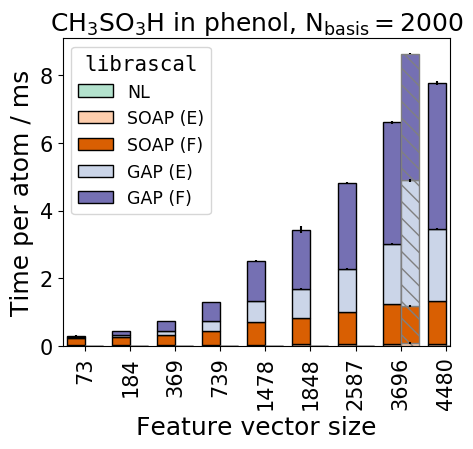

In [373]:
plt.style.use('beamer')
#fig, axs = plt.subplots(1, 3, sharey=False)
#fig, (axl, axb) = plt.subplots(1, 2, sharey=False, gridspec_kw={'width_ratios': (2, 3)})
fig = plt.gcf()
axb = fig.gca()
display_names = {
    'methane_liquid': "Liquid CH$_4$",
    'methane_sulfonic': "CH$_3$SO$_3$H in phenol",
    'silicon_bulk': 'Solid Si',
    'molecular_crystals': 'CSD500'
}
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_rascal_nograd = benchmarks_nograd.groupby('name')
timings_bysystem_quip = timings_quipnew.groupby(['system_name', 'n_max', 'l_max'])

#for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
system_name = 'methane_sulfonic'
timing_rascal = timings_bysystem_rascal.get_group(system_name)
timing_rascal_nograd = timings_bysystem_rascal_nograd.get_group(system_name)
# Fuckin'ell, why does grouping have to be so A-R
timing_quip = timings_bysystem_quip.get_group(systems_nl_groups[system_name])
ax = plt.gca()
# librascal
timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
timing_breakdown = timing_breakdown.sort_index().rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_stdev = timing_breakdown_stdev.rename(columns={
    'pred energy': 'GAP (E)',
    'pred forces': 'GAP (F)',
    'rep with grad': 'SOAP (E+F)'
})
timing_breakdown_nograd = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='mean per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown = timing_breakdown.assign(**{
    'SOAP (F)': (lambda x: x['SOAP (E+F)'] - timing_breakdown_nograd['SOAP (E)']),
    'SOAP (E)': timing_breakdown_nograd['SOAP (E)']
})[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']]
timing_breakdown_nograd_stdev = timing_rascal_nograd.pivot(index='n_features', columns='tag', values='stdev per atom / ms').sort_index().rename(
    columns={'rep': 'SOAP (E)', 'pred energy': 'GAP (E)', 'pred forces': 'GAP (F)'})
timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                          color={'NL': palette_pastel[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          yerr=timing_breakdown_stdev,align='edge', edgecolor='k')

# QUIP
# Oh nooo... prevent conflict in case n_sparse coincides with an n_features
timing = timing_quip.set_index('n_sparse').loc[2000:2000]
timing_new = timing.reindex(timing_breakdown.index)
timing_new.loc[descriptor_sizes_quip[system_name]] = timing.loc[2000]
timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                          ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                 'energy_soap_timesub_peratom_mean': 'SOAP (E)',
                                 'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                 inplace=True)
timing_breakdown = timing_breakdown.assign(
    **{'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
       'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
       'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
timing_breakdown = timing_breakdown[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']] * 1000
timing_errs = timing.rename(
    columns={'energy_soap_timesub_peratom_std': 'SOAP (E)',
             'force_soap_timesub_peratom_std': 'SOAP (F)',
             'energy_gap_timesub_peratom_std': 'GAP (E)',
             'force_gap_timesub_peratom_std': 'GAP (F)'}) * 1000
# Ugh, did not think this through... ok, this is ugly, but it works
timing_errs.loc[descriptor_sizes_quip[system_name]] = timing_errs.loc[2000]
timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                          xlabel='Feature vector size', yerr=timing_errs,
                          color={'NL': palette_dark[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                 'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                          align='edge', legend=False, edgecolor='gray', hatch=r'\\')

axb.get_legend().set_title('librascal', prop={'family': 'monospace'})
axb.set_xlim(-0.5, 8.1)
axb.set_title(display_names[system_name] + ", $N_\mathrm{basis}=$2000")
plt.gcf().set_size_inches((5, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
#fig.savefig('/local/scratch/mveit/presentations/202009-groupmeeting/figures/quip_rascal_featsparse_ef_si.pdf', bbox_inches='tight')
#fig.savefig('/local/scratch/mveit/papers/librascal/featsparse_old_silicon_forces.pdf', bbox_inches='tight')

OLD (unoptimized forces)

         system_name  n_max  l_max  energy_calc_connect_timesub_peratom_mean  \
n_sparse                                                                       
1000             qm9     12      9                                  0.000011   
2000             qm9     12      9                                  0.000012   
5000             qm9     12      9                                  0.000011   
500              qm9     12      9                                  0.000011   
100              qm9     12      9                                  0.000011   
9000             qm9     12      9                                  0.000014   
200              qm9     12      9                                  0.000011   

          energy_calc_connect_timesub_peratom_min  \
n_sparse                                            
1000                                     0.000009   
2000                                     0.000009   
5000                                     0.000009   
500           

/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/local/scratch/mveit/miniconda3/envs/rascal-clean/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


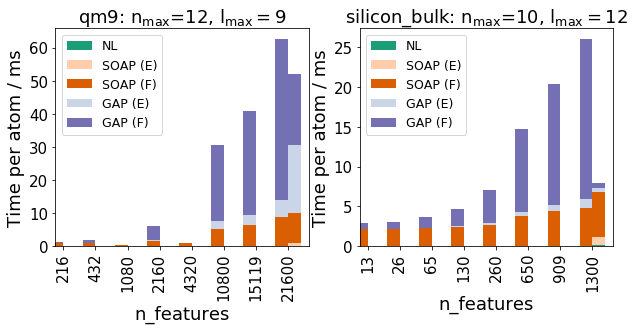

In [330]:
plt.style.use('beamer')
fig, axs = plt.subplots(1, 2)
timings_bysystem_rascal = benchmarks.groupby('name')
timings_bysystem_quip = timings.groupby(['system_name', 'n_max', 'l_max'])
timings_bysystem_quip_filter = (group for group in timings_bysystem_quip if group[0][0] in systems_short)
# I think we can rely on the sorting-by-keys to keep these in the same order...
for ax, (system_name, timing_rascal), (system_data, timing_quip) in zip(axs.flat, timings_bysystem_rascal, timings_bysystem_quip_filter):
    # librascal
    timing_breakdown = timing_rascal.pivot(index='n_features', columns='tag', values='mean per atom / ms')
    timing_breakdown_stdev = timing_rascal.pivot(index='n_features', columns='tag', values='stdev per atom / ms')
    timing_breakdown = timing_breakdown.sort_index().rename(columns={
        'pred energy': 'GAP (E)',
        'pred forces': 'GAP (F)',
        'rep with grad': 'SOAP (E+F)'})[['NL', 'SOAP (E+F)', 'GAP (E)', 'GAP (F)']]
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=-0.4, ylabel='Time per atom / ms',
                              color={'NL': palette_dark[0], 'SOAP (E+F)': palette_dark[1],
                                     'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                              legend=False, align='edge')
    
    # QUIP
    timing = timing_quip.set_index('n_sparse')
    timing_new = timing.reindex(timing_breakdown.index)
    timing_new.loc[n_features_tot[system_name]] = timing.loc[2000]  # I'm not sure this is right -- try QUIP's descriptor_sizes
    print(timing)
    timing_breakdown = timing_new[['force_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']] +
                              ['energy_{:s}_timesub_peratom_mean'.format(name) for name in ['calc_connect', 'soap', 'gap']]]
    timing_breakdown.rename(columns={'energy_calc_connect_timesub_peratom_mean': 'NL',
                                     'energy_soap_timesub_peratom_mean': 'SOAP (E)',
                                     'energy_gap_timesub_peratom_mean': 'GAP (E)'},
                                     inplace=True)
    timing_breakdown = timing_breakdown.assign(
        **{'SOAP (F)': (lambda x: x['force_soap_timesub_peratom_mean'] - x['SOAP (E)']),
           'GAP (F)': (lambda x: x['force_gap_timesub_peratom_mean'] - x['GAP (E)']),
           'NL': (lambda x: (x['NL'] + x['force_calc_connect_timesub_peratom_mean']) / 2)})
    timing_breakdown = timing_breakdown[['NL', 'SOAP (E)', 'SOAP (F)', 'GAP (E)', 'GAP (F)']] * 1000
    timing_errs = timing[['energy_soap_timesub_peratom_std',
                          'force_soap_timesub_peratom_std']].rename(
        columns={'energy_soap_timesub_peratom_std': 'SOAP (E)',
                 'force_soap_timesub_peratom_std': 'SOAP (F)'}) * 1000
    
    timing_breakdown.plot.bar(ax=ax, stacked=True, width=0.4, ylabel='Time per atom / ms',
                              color={'NL': palette_dark[0], 'SOAP (E)': palette_pastel[1], 'SOAP (F)': palette_dark[1],
                                     'GAP (E)': palette_pastel[2], 'GAP (F)': palette_dark[2]},
                              align='edge')
    ax.set_title("{:s}: $n_\\mathrm{{max}}$={:d}, $l_\\mathrm{{max}}={:d}$".format(*system_data))
    #ax.set_xlim(0, 10) # AAAAAAAAARRRRRRRRGHGHGHGGHG FUCKING PANDAS WHY
fig.set_size_inches((10, 4))
#fig.suptitle('librascal (left) vs. QUIP (right)')
fig.savefig('/local/scratch/mveit/presentations/202009-marvel/figures/quip_rascal_featsparse.pdf', bbox_inches='tight')

# Inspect the variation in timings (consistency)

## Liquid methane

In [78]:
jobs = project.find_jobs({'system_name': 'methane_liquid', 'train_with_forces': False, 'n_max': 8, 'n_sparse': 100})

In [79]:
job = jobs.next()

In [80]:
thedata = job.data.open()

(array([ 17.,   0.,   0.,   0.,   0.,   7.,  13., 107., 105.,   9.]),
 array([0.00102079, 0.00119472, 0.00136864, 0.00154257, 0.0017165 ,
        0.00189043, 0.00206436, 0.00223829, 0.00241221, 0.00258614,
        0.00276007]),
 <a list of 10 Patch objects>)

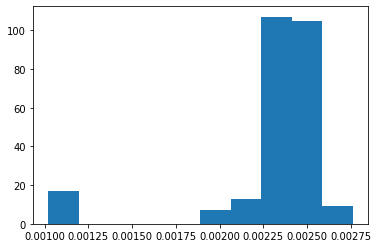

In [81]:
plt.hist(np.sum(thedata['energy_calc_connect'], axis=1))

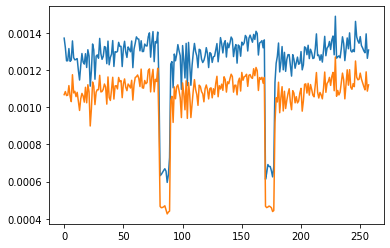

In [82]:
plt.plot(thedata['energy_calc_connect'][:,0])
plt.plot(thedata['energy_calc_connect'][:,1])

Seems `calc_connect` is affected by the cell density in the same way as SOAP (see below) is.

(array([11.,  7.,  4.,  4.,  9., 33., 69., 59., 47., 15.]),
 array([0.01443914, 0.0177606 , 0.02108206, 0.02440352, 0.02772499,
        0.03104645, 0.03436791, 0.03768937, 0.04101083, 0.0443323 ,
        0.04765376]),
 <a list of 10 Patch objects>)

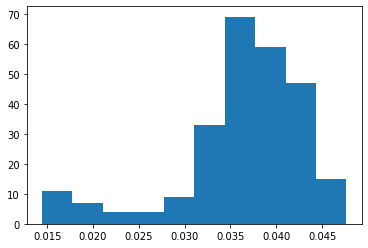

In [83]:
plt.hist(np.sum(thedata['energy_soap'], axis=1))

(array([11.,  7.,  4.,  4.,  9., 35., 67., 60., 47., 14.]),
 array([0.01146989, 0.01408756, 0.01670524, 0.01932291, 0.02194058,
        0.02455826, 0.02717593, 0.02979361, 0.03241128, 0.03502895,
        0.03764663]),
 <a list of 10 Patch objects>)

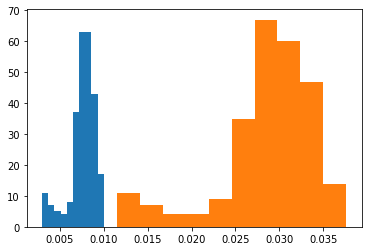

In [84]:
plt.hist(thedata['energy_soap'][:,0])
plt.hist(thedata['energy_soap'][:,1])

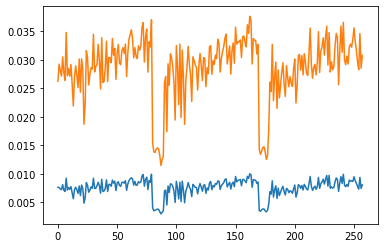

In [85]:
plt.plot(thedata['energy_soap'][:,0])
plt.plot(thedata['energy_soap'][:,1])

In [86]:
ref_geoms = ase.io.read('scripts/quip/xyz_files/mebox-minimal-pbe0-b1b.xyz', ':')
refvols = np.array([geom.get_volume() for geom in ref_geoms])

In [87]:
len(ref_geoms[0])

135

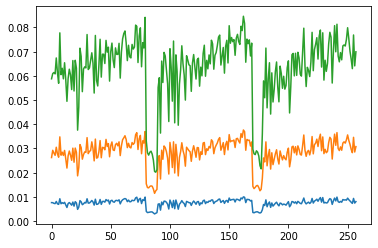

In [88]:
plt.plot(thedata['energy_soap'][:,0])
plt.plot(thedata['energy_soap'][:,1])
plt.plot(135 / refvols) # Density in atoms/Å^3

In [131]:
ws = job.workspace()
!grep soap $ws/potential.xml

      <descriptor>soap atom_sigma=0.300000 l_max=6 n_max=8 cutoff=5.000000 cutoff_transition_width=1.000000 energy_scale=1.000000             n_species=2 species_Z={ 1 6 } n_sparse=100 sparse_method=cur_points covariance_type=dot_product soap_exponent=4 n_species=2 Z=6 species_Z={6 1 }</descriptor>
      <descriptor>soap atom_sigma=0.300000 l_max=6 n_max=8 cutoff=5.000000 cutoff_transition_width=1.000000 energy_scale=1.000000             n_species=2 species_Z={ 1 6 } n_sparse=100 sparse_method=cur_points covariance_type=dot_product soap_exponent=4 n_species=2 Z=1 species_Z={6 1 }</descriptor>
  <command_line><![CDATA[ at_file=/scratch/veit/quip_benchmarks/xyz_files/mebox-minimal-pbe0-b1b.xyz gap={soap atom_sigma=0.300000 l_max=6 n_max=8 cutoff=5.000000 cutoff_transition_width=1.000000 energy_scale=1.000000 add_species n_species=2 species_Z={{ 1 6 }} n_sparse=100 sparse_method=cur_points covariance_type=dot_product soap_exponent=4 } default_kernel_regularisation={ 0.001000 0.010000 1.0 

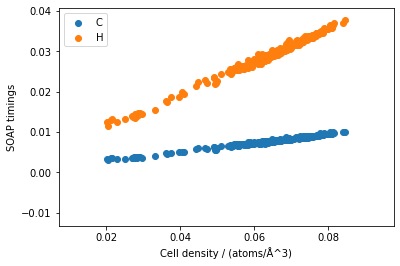

In [89]:
plt.scatter(135 / refvols, thedata['energy_soap'][:,0], label='C')
plt.scatter(135 / refvols, thedata['energy_soap'][:,1], label='H')
plt.xlabel('Cell density / (atoms/Å^3)')
plt.ylabel('SOAP timings')
plt.legend()

In [90]:
# Cutoff sphere volume
csphere_vol = 4/3. * np.pi * 5.0**3
csphere_vol

523.5987755982989

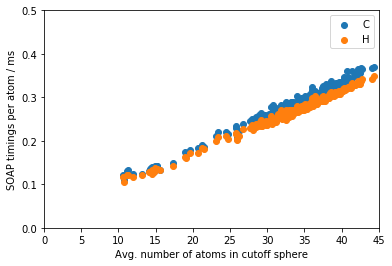

In [97]:
plt.scatter(135 / refvols * csphere_vol, thedata['energy_soap'][:,0] / 27 * 1000, label='C')
plt.scatter(135 / refvols * csphere_vol, thedata['energy_soap'][:,1] / 108 * 1000, label='H')
plt.xlabel('Avg. number of atoms in cutoff sphere')
plt.ylabel('SOAP timings per atom / ms')
plt.ylim(0, 0.5)
plt.xlim(0, 45)
plt.legend()

so the SOAP timings are directly correlated with number of neighbours within the cutoff sphere.  That's... unsurprising, but how do we account for this in the final timings?  What are the density distributions in other test sets?  (see below...)

Also, these are not normalized by # atoms, which is why the H timings appear so much larger than the C timings (there are 4x as many C as H in each configuration)

And BTW is it the same linear relationship for `calc_connect`...?

(0, 0.002)

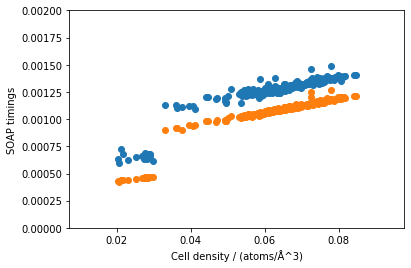

In [135]:
plt.scatter(135 / refvols, thedata['energy_calc_connect'][:,0])
plt.scatter(135 / refvols, thedata['energy_calc_connect'][:,1])
plt.xlabel('Cell density / (atoms/Å^3)')
plt.ylabel('SOAP timings')
plt.ylim(0, 0.002)

Interesting... not quite; the step is probably due to an extra NL cell being added.

(array([ 49., 107.,  86.,  10.,   4.,   1.,   0.,   0.,   0.,   1.]),
 array([0.00352984, 0.00357478, 0.00361971, 0.00366464, 0.00370958,
        0.00375451, 0.00379944, 0.00384438, 0.00388931, 0.00393424,
        0.00397918]),
 <a list of 10 Patch objects>)

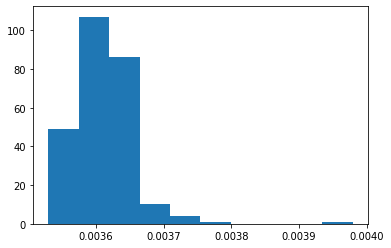

In [86]:
plt.hist(np.sum(thedata['energy_gap'], axis=1))

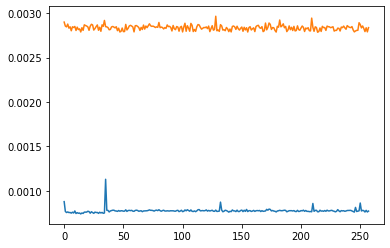

In [99]:
plt.plot(thedata['energy_gap'][:,0])
plt.plot(thedata['energy_gap'][:,1])

(array([11.,  7.,  4.,  4.,  9., 36., 66., 60., 46., 15.]),
 array([0.01832258, 0.02164242, 0.02496225, 0.02828208, 0.03160192,
        0.03492175, 0.03824158, 0.04156142, 0.04488125, 0.04820108,
        0.05152092]),
 <a list of 10 Patch objects>)

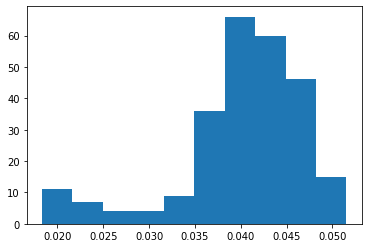

In [87]:
plt.hist(np.sum(thedata['energy_ip_total'], axis=1))

And the GAP timings are basically independent of the cell volume, mostly consistent with only a few occasional blips.  The overall timings are (still) dominated by SOAP at this small $N_\mathrm{sparse}$ value.

In [158]:
thedata.close()

## Density distribution in other test sets (comparison)

(0, 0.09)

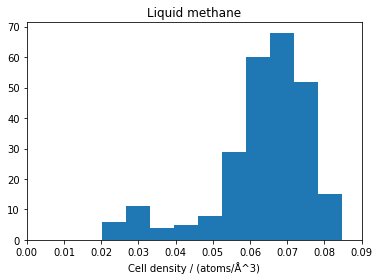

In [157]:
plt.hist(135 / refvols)
plt.xlabel('Cell density / (atoms/Å^3)')
plt.title('Liquid methane')
plt.xlim(0, 0.09)

In [167]:
si_geoms = ase.io.iread('scripts/quip/xyz_files/gp_iter6_sparse9k.xml.xyz', ':')
si_densities = [len(geom) / geom.get_volume() for geom in si_geoms]

Text(0.5, 1.0, 'Silicon dataset')

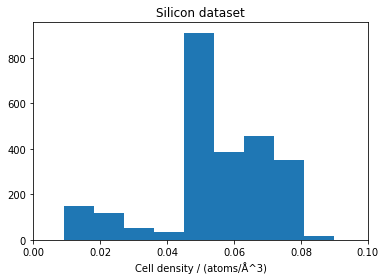

In [168]:
plt.hist(si_densities)
plt.xlabel('Cell density / (atoms/Å^3)')
plt.xlim(0.0, 0.1)
plt.title('Silicon dataset')

Text(0.5, 1.0, 'Silicon dataset (subset)')

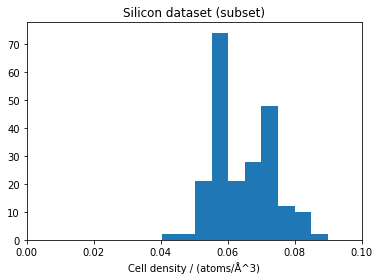

In [170]:
plt.hist(si_densities[600:820])
plt.xlabel('Cell density / (atoms/Å^3)')
plt.xlim(0.0, 0.1)
plt.title('Silicon dataset (subset)')

In [151]:
molcrys_geoms = ase.io.iread('scripts/quip/xyz_files/CSD1000-r.xyz', ':')
molcrys_densities = [len(geom) / geom.get_volume() for geom in molcrys_geoms]

(0, 0.135)

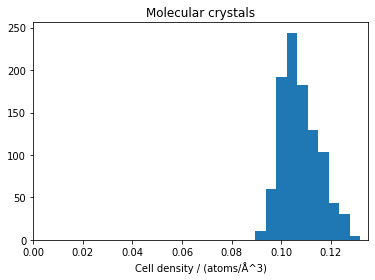

In [155]:
plt.hist(molcrys_densities)
plt.xlabel('Cell density / (atoms/Å^3)')
plt.title('Molecular crystals')
plt.xlim(0, 0.135)